In [ ]:
import pandas as pd

In [ ]:
m10.shape

(343337, 24)

# Lecture ACS

In [ ]:
acs10=pd.read_csv('acs2010.csv')
acs11=pd.read_csv('acs2011.csv')
acs12=pd.read_csv('acs2012.csv')
acs13=pd.read_csv('acs2013.csv')
acs14=pd.read_csv('acs2014.csv')
acs15=pd.read_csv('acs2015.csv')
acs16=pd.read_csv('acs2016.csv')
acs17=pd.read_csv('acs2017.csv')
acs18=pd.read_csv('acs2018.csv')
acs19=pd.read_csv('acs2019.csv')

acs21=pd.read_csv('acs2021.csv')
acs22=pd.read_csv('acs2022.csv')
acs23=pd.read_csv('acs2023.csv')


## Ajouter une colonne Niveau d'éducation pondéré

In [ ]:
# Calculer un niveau  d'éducation pondéré

def calculate_education_level(df):

  df['Average Education Level'] = (
      df['Less than High School Diploma Percentage'] * 1 +
      df['High School Graduate Percentage'] * 2 +
      df['Some College or Associate Degree Percentage'] * 3 +
      df['Bachelor\'s Degree or Higher Percentage'] * 4 +
      df['Graduate or Professional Degree Percentage'] * 5
  ) / 100


In [ ]:
calculate_education_level(acs10)
calculate_education_level(acs11)
calculate_education_level(acs12)
calculate_education_level(acs13)
calculate_education_level(acs14)
calculate_education_level(acs15)
calculate_education_level(acs16)
calculate_education_level(acs17)
calculate_education_level(acs18)
calculate_education_level(acs19)
calculate_education_level(acs21)
calculate_education_level(acs22)
calculate_education_level(acs23)

## Ajouter une colonne Year

In [ ]:
datasets = [acs10, acs11, acs12, acs13, acs14,
            acs15, acs16, acs17, acs18, acs19,
            acs21, acs22, acs23]

years = list(range(2010, 2024))
years.remove(2020)  # Supprimer l'année 2020

# Ajouter la colonne 'Year' à chaque dataset
for dataset, year in zip(datasets, years):
    dataset.insert(0, 'Year', year)



In [ ]:
acs10.head()

,Year,Geographic Area,Total Population,Male Percentage,Female Percentage,Under 5 Years Percentage,5-17 Years Percentage,18-24 Years Percentage,25-34 Years Percentage,35-44 Years Percentage,...,Public Health Insurance Coverage Percentage,Private Health Insurance Coverage Percentage,White %,Black %,Asian %,Other Race %,American Indian %,Native Hawaiian %,Not hispanic %,Average Education Level
0,2010,Alabama,4785298,48.5,51.5,6.4,17.3,10.2,12.6,13.0,...,32.5,65.4,69.468526,26.392923,NaN,NaN,NaN,NaN,96.180071,2.631
1,2010,Alaska,713985,52.2,47.8,7.5,18.9,10.5,14.5,13.1,...,23.6,64.8,67.430828,NaN,NaN,NaN,14.641624,NaN,94.298900,2.940
2,2010,Arizona,6413737,49.7,50.3,7.1,18.3,9.9,13.4,12.8,...,34.2,60.4,79.444761,4.116305,2.713535,6.436279,4.455562,NaN,70.237102,2.815
3,2010,Arkansas,2921606,49.0,51.0,6.7,17.7,10.0,12.6,12.7,...,36.0,58.8,78.371108,15.895744,NaN,NaN,NaN,NaN,93.747480,2.573
4,2010,California,37349363,49.7,50.3,6.8,18.1,10.6,14.3,13.9,...,29.1,60.6,62.445386,6.014435,13.121945,13.081811,0.754787,0.382689,62.276703,2.817


## Merge acs_ en un dataset

### Données d'entraînement (2010 - 2019)

In [ ]:
# Liste des datasets à concaténer (acs10_final à acs19_final)
datasets = [acs10, acs11, acs12, acs13, acs14,
            acs15, acs16, acs17, acs18, acs19]

# Concaténer tous les datasets verticalement
train_acs = pd.concat(datasets, ignore_index=True)

train_acs.shape
train_acs.head()

,Year,Geographic Area,Total Population,Male Percentage,Female Percentage,Under 5 Years Percentage,5-17 Years Percentage,18-24 Years Percentage,25-34 Years Percentage,35-44 Years Percentage,...,Public Health Insurance Coverage Percentage,Private Health Insurance Coverage Percentage,White %,Black %,Asian %,Other Race %,American Indian %,Native Hawaiian %,Not hispanic %,Average Education Level
0,2010,Alabama,4785298.0,48.5,51.5,6.4,17.3,10.2,12.6,13.0,...,32.5,65.4,69.468526,26.392923,NaN,NaN,NaN,NaN,96.180071,2.631
1,2010,Alaska,713985.0,52.2,47.8,7.5,18.9,10.5,14.5,13.1,...,23.6,64.8,67.430828,NaN,NaN,NaN,14.641624,NaN,94.298900,2.940
2,2010,Arizona,6413737.0,49.7,50.3,7.1,18.3,9.9,13.4,12.8,...,34.2,60.4,79.444761,4.116305,2.713535,6.436279,4.455562,NaN,70.237102,2.815
3,2010,Arkansas,2921606.0,49.0,51.0,6.7,17.7,10.0,12.6,12.7,...,36.0,58.8,78.371108,15.895744,NaN,NaN,NaN,NaN,93.747480,2.573
4,2010,California,37349363.0,49.7,50.3,6.8,18.1,10.6,14.3,13.9,...,29.1,60.6,62.445386,6.014435,13.121945,13.081811,0.754787,0.382689,62.276703,2.817


### Données de test (2021 -2023)

In [ ]:
datasets = [acs21, acs22, acs23]

# Concaténer tous les datasets verticalement
test_acs = pd.concat(datasets, ignore_index=True)

test_acs.head()

,Year,Geographic Area,Total Population,Male Percentage,Female Percentage,Under 5 Years Percentage,5-17 Years Percentage,18-24 Years Percentage,25-34 Years Percentage,35-44 Years Percentage,...,Public Health Insurance Coverage Percentage,Private Health Insurance Coverage Percentage,White %,Black %,Asian %,Other Race %,American Indian %,Native Hawaiian %,Not hispanic %,Average Education Level
0,2021,Alabama,5039877,48.5,51.5,5.8,16.5,9.3,12.6,12.7,...,37.3,66.4,65.118276,25.895592,1.365371,2.122572,NaN,NaN,95.288893,2.832
1,2021,Alaska,732673,52.3,47.7,6.3,18.2,9.2,15.3,14.1,...,37.6,64.2,59.372189,NaN,NaN,NaN,13.702839,NaN,92.862983,3.034
2,2021,Arizona,7276316,49.9,50.1,5.5,16.7,9.4,13.8,12.6,...,39.0,63.2,58.294183,4.489057,3.371005,9.530730,4.049549,NaN,67.687989,2.995
3,2021,Arkansas,3025891,49.4,50.6,5.9,17.3,9.4,12.7,12.7,...,44.4,59.0,69.924759,14.785794,NaN,2.993763,NaN,NaN,91.815931,2.780
4,2021,California,39237836,50.0,50.0,5.6,16.7,9.1,14.9,13.8,...,39.3,63.7,39.359398,5.508675,15.208522,19.173978,1.364673,0.3877,59.848428,2.979


## Gestion des valeurs manquantes

In [ ]:
acs11[acs11['Geographic Area'] =='Puerto Rico']

,Year,Geographic Area,Total Population,Male Percentage,Female Percentage,Under 5 Years Percentage,5-17 Years Percentage,18-24 Years Percentage,25-34 Years Percentage,35-44 Years Percentage,...,Public Health Insurance Coverage Percentage,Private Health Insurance Coverage Percentage,White %,Black %,Asian %,Other Race %,American Indian %,Native Hawaiian %,Not hispanic %,Average Education Level
51,2011,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Supprimer la ligne où Year == 2011 et Geographic Area == "Puerto Rico"

train_acs = train_acs[~((train_acs['Year'] == 2011) & (train_acs['Geographic Area'] == "Puerto Rico"))]


In [ ]:
ethnic_columns = ['Black %', 'Asian %', 'Other Race %', 'American Indian %', 'Native Hawaiian %']

def impute_ethnic_columns(df, columns, group_column='Geographic Area'):
    for col in columns:
        # Imputation par la médiane par groupe
        df[col] = df.groupby(group_column)[col].transform(lambda x: x.fillna(x.median()))

        # Imputation par la médiane globale si des NaN subsistent
        if df[col].isna().any():
            df[col].fillna(df[col].median(), inplace=True)

    return df


In [ ]:
train_acs = impute_ethnic_columns(train_acs, ethnic_columns)
test_acs = impute_ethnic_columns(test_acs, ethnic_columns)

<ipython-input-11-1cb5a4706120>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
<ipython-input-11-1cb5a4706120>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

### To csv

In [ ]:
train_acs.to_csv("train_acs.csv", index=False)
test_acs.to_csv("test_acs.csv", index=False)

# Lecture BFRSS

In [ ]:
m10 = pd.read_csv('m10.csv')
m11 = pd.read_csv('m11.csv')
m12 = pd.read_csv('m12.csv')
m13 = pd.read_csv('m13.csv')
m14 = pd.read_csv('m14.csv')
m15 = pd.read_csv('m15.csv')
m16 = pd.read_csv('m16.csv')
m17 = pd.read_csv('m17.csv')
m18 = pd.read_csv('m18.csv')
m19 = pd.read_csv('m19.csv')
m20 = pd.read_csv('m20.csv')
m21 = pd.read_csv('m21.csv')
m22 = pd.read_csv('m22.csv')
m23 = pd.read_csv('m23.csv')

In [ ]:
state_dict = {
    1: "Alabama",
    2: "Alaska",
    4: "Arizona",
    5: "Arkansas",
    6: "California",
    8: "Colorado",
    9: "Connecticut",
    10: "Delaware",
    11: "District of Columbia",
    12: "Florida",
    13: "Georgia",
    15: "Hawaii",
    16: "Idaho",
    17: "Illinois",
    18: "Indiana",
    19: "Iowa",
    20: "Kansas",
    22: "Louisiana",
    23: "Maine",
    24: "Maryland",
    25: "Massachusetts",
    26: "Michigan",
    27: "Minnesota",
    28: "Mississippi",
    29: "Missouri",
    30: "Montana",
    31: "Nebraska",
    32: "Nevada",
    33: "New Hampshire",
    34: "New Jersey",
    35: "New Mexico",
    36: "New York",
    37: "North Carolina",
    38: "North Dakota",
    39: "Ohio",
    40: "Oklahoma",
    41: "Oregon",
    44: "Rhode Island",
    45: "South Carolina",
    46: "South Dakota",
    47: "Tennessee",
    48: "Texas",
    49: "Utah",
    50: "Vermont",
    51: "Virginia",
    53: "Washington",
    54: "West Virginia",
    55: "Wisconsin",
    56: "Wyoming",
    66: "Guam",
    72: "Puerto Rico",
    78: "Virgin Islands",
}


# Génération de colonnes diabete par tranche d'âge

In [ ]:
# Définir les tranches d'âge
age_labels = {
    1: '18_24',
    2: '25_34',
    3: '35_44',
    4: '45_54',
    5: '55_64',
    6: '65_'
}


## Données d'entraînement

In [ ]:
tables = [m10, m11, m12, m13, m14, m15, m16, m17, m18, m19]
years = list(range(2010, 2020))

results = []

for table, year in zip(tables, years):

    table['AGE_GROUP_LABEL'] = table['AGE_GROUP'].map(age_labels)

    diabetes_cases = table[table['diabetes'] == 1]

    age_group_counts = (
        diabetes_cases
        .groupby(['STATE_CODE', 'AGE_GROUP_LABEL'])
        .size()
        .reset_index(name='count')
    )

    state_totals = (
        diabetes_cases
        .groupby('STATE_CODE')
        .size()
        .reset_index(name='total')
    )

    merged = pd.merge(age_group_counts, state_totals, on='STATE_CODE')

    merged['percentage'] = (merged['count'] / merged['total']) * 100

    result_age = merged.pivot(index='STATE_CODE', columns='AGE_GROUP_LABEL', values='percentage').fillna(0)

    result_age.columns = [f'diabete_{col}' for col in result_age.columns]
    result_age = result_age.reset_index()

    result_age['diabetes_percentage'] = (
        state_totals.set_index('STATE_CODE')['total'] / table.groupby('STATE_CODE')['diabetes'].count() * 100
    ).reindex(result_age['STATE_CODE']).values

    result_age['Geographic Area'] = result_age['STATE_CODE'].map(state_dict)

    result_age['Year'] = year

    results.append(result_age)

train_diabete = pd.concat(results, ignore_index=True)

In [ ]:
train_diabete.head()

,STATE_CODE,diabete_18_24,diabete_25_34,diabete_35_44,diabete_45_54,diabete_55_64,diabete_65_,diabetes_percentage,Geographic Area,Year
0,1.0,0.243902,2.926829,7.195122,17.195122,28.048780,44.390244,15.553869,Alabama,2010
1,2.0,1.086957,4.347826,5.434783,22.826087,35.869565,30.434783,6.349206,Alaska,2010
2,4.0,0.000000,0.897666,4.308797,13.464991,30.341113,50.987433,12.491590,Arizona,2010
3,5.0,0.000000,1.116071,5.357143,14.508929,29.910714,49.107143,15.130024,Arkansas,2010
4,6.0,0.445293,2.099237,5.089059,16.348601,28.625954,47.391858,10.658350,California,2010


## Données de Test

In [ ]:
tables = [m21, m22, m23]
years = list(range(2021, 2024))

results = []

for table, year in zip(tables, years):

    table['AGE_GROUP_LABEL'] = table['AGE_GROUP'].map(age_labels)

    diabetes_cases = table[table['diabetes'] == 1]

    age_group_counts = (
        diabetes_cases
        .groupby(['STATE_CODE', 'AGE_GROUP_LABEL'])
        .size()
        .reset_index(name='count')
    )

    state_totals = (
        diabetes_cases
        .groupby('STATE_CODE')
        .size()
        .reset_index(name='total')
    )

    merged = pd.merge(age_group_counts, state_totals, on='STATE_CODE')

    merged['percentage'] = (merged['count'] / merged['total']) * 100

    result_age = merged.pivot(index='STATE_CODE', columns='AGE_GROUP_LABEL', values='percentage').fillna(0)

    result_age.columns = [f'diabete_{col}' for col in result_age.columns]
    result_age = result_age.reset_index()

    result_age['diabetes_percentage'] = (
        state_totals.set_index('STATE_CODE')['total'] / table.groupby('STATE_CODE')['diabetes'].count() * 100
    ).reindex(result_age['STATE_CODE']).values

    result_age['Geographic Area'] = result_age['STATE_CODE'].map(state_dict)

    result_age['Year'] = year

    results.append(result_age)

test_diabete = pd.concat(results, ignore_index=True)

In [ ]:
test_diabete.head()

,STATE_CODE,diabete_18_24,diabete_25_34,diabete_35_44,diabete_45_54,diabete_55_64,diabete_65_,diabetes_percentage,Geographic Area,Year
0,1.0,0.190840,2.480916,4.007634,14.885496,23.473282,54.961832,17.073965,Alabama,2021
1,2.0,0.268817,1.075269,6.182796,12.365591,30.645161,49.462366,9.906791,Alaska,2021
2,4.0,0.223214,1.674107,6.361607,13.950893,26.785714,51.004464,12.230412,Arizona,2021
3,5.0,0.168919,1.182432,2.702703,7.432432,21.283784,67.229730,17.629541,Arkansas,2021
4,6.0,1.386482,3.119584,7.105719,14.731369,29.636049,44.020797,11.396405,California,2021


## To csv

In [ ]:
train_diabete.to_csv("diabetes_by_age_and_state_Train.csv", index=False)
test_diabete.to_csv("diabetes_by_age_and_state_Test.csv", index=False)

# Merge ACS et Colonnes diabete_âge

In [ ]:
print(train_acs.shape)
print(test_acs.shape)

(510, 49)
(153, 49)


In [ ]:
train_dataset = pd.merge(
    train_acs,
    train_diabete,
    on=['Geographic Area', 'Year'],
    how='inner'  # 'inner' : uniquement les lignes présentes dans les deux datasets
)


test_dataset = pd.merge(
    test_acs,
    test_diabete,
    on=['Geographic Area', 'Year'],
    how='inner'  # 'inner' : uniquement les lignes présentes dans les deux datasets
)

In [ ]:
print(train_dataset.shape)
print(test_dataset.shape)

(472, 57)
(146, 57)


In [ ]:
train_dataset.head(2)

,Year,Geographic Area,Total Population,Male Percentage,Female Percentage,Under 5 Years Percentage,5-17 Years Percentage,18-24 Years Percentage,25-34 Years Percentage,35-44 Years Percentage,...,Not hispanic %,Average Education Level,STATE_CODE,diabete_18_24,diabete_25_34,diabete_35_44,diabete_45_54,diabete_55_64,diabete_65_,diabetes_percentage
0,2010,Alabama,4785298.0,48.5,51.5,6.4,17.3,10.2,12.6,13.0,...,96.180071,2.631,1.0,0.243902,2.926829,7.195122,17.195122,28.048780,44.390244,15.553869
1,2010,Alaska,713985.0,52.2,47.8,7.5,18.9,10.5,14.5,13.1,...,94.298900,2.940,2.0,1.086957,4.347826,5.434783,22.826087,35.869565,30.434783,6.349206


## To csv

In [ ]:
train_dataset.to_csv("train_dataset.csv", index=False)
test_dataset.to_csv("test_dataset.csv", index=False)

# Régression multi sorties

In [ ]:

features = [
    "Total Population", "Male Percentage",
    "Under 5 Years Percentage", "5-17 Years Percentage",
    "18-24 Years Percentage", "25-34 Years Percentage", '35-44 Years Percentage','45-54 Years Percentage', '55-64 Years Percentage', '65-74 Years Percentage',
    "Median Age", "Income in the Past 12 Months", "Poverty Percentage",
    'Average Education Level',
    'No Health Insurance Coverage Percentage', 'Public Health Insurance Coverage Percentage','Private Health Insurance Coverage Percentage',
    'White %', 'Black %', 'Asian %', 'American Indian %', 'Native Hawaiian %','Not hispanic %'
]

targets = ["diabete_18_24", "diabete_25_34", "diabete_35_44",
           "diabete_45_54", "diabete_55_64", "diabete_65_", "diabetes_percentage"]


## Tester la performance de plusieurs modèles

Pour différents modèles de base, on compare les performance des modèles **MultiOutputRegressor** et de **RegressorChain** utilisées pour gérer les tâches de régression multi-cibles.

La principale différence entre les deux modèles réside dans leur approche des cibles : le premier traite chaque cible de manière indépendante, tandis que le second exploite les dépendances entre les cibles en les entraînant de façon séquentielle.

In [ ]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

base_models = {
    "RandomForest": RandomForestRegressor(random_state=42, max_depth=10, n_estimators=100),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LinearRegression": LinearRegression()
}


X_train = train_dataset[features]
y_train = train_dataset[targets]

X_test = test_dataset[features]
y_test = test_dataset[targets]


results = []

# Tester MultiOutputRegressor et RegressorChain pour chaque modèle de base

for model_name, base_model in base_models.items():

    # **MultiOutputRegressor**
    mo_model = MultiOutputRegressor(base_model)
    mo_model.fit(X_train, y_train)
    y_test_pred_mo = mo_model.predict(X_test)

    # Calcul des métriques pour MultiOutputRegressor
    mo_mse = mean_squared_error(y_test, y_test_pred_mo, multioutput='raw_values')
    mo_rmse = np.sqrt(mo_mse)
    mo_mae = mean_absolute_error(y_test, y_test_pred_mo, multioutput='raw_values')
    mo_r2 = r2_score(y_test, y_test_pred_mo, multioutput='raw_values')

    for i, target in enumerate(targets):
        results.append({
            "Model": model_name,
            "Wrapper": "MultiOutput",
            "Target": target,
            "MSE": mo_mse[i],
            "RMSE": mo_rmse[i],
            "MAE": mo_mae[i],
            "R²": mo_r2[i]
        })

    # **RegressorChain**
    rc_model = RegressorChain(base_model)
    rc_model.fit(X_train, y_train)
    y_test_pred_rc = rc_model.predict(X_test)

    # Calcul des métriques pour RegressorChain
    rc_mse = mean_squared_error(y_test, y_test_pred_rc, multioutput='raw_values')
    rc_rmse = np.sqrt(rc_mse)
    rc_mae = mean_absolute_error(y_test, y_test_pred_rc, multioutput='raw_values')
    rc_r2 = r2_score(y_test, y_test_pred_rc, multioutput='raw_values')

    for i, target in enumerate(targets):
        results.append({
            "Model": model_name,
            "Wrapper": "RegressorChain",
            "Target": target,
            "MSE": rc_mse[i],
            "RMSE": rc_rmse[i],
            "MAE": rc_mae[i],
            "R²": rc_r2[i]
        })

results_data = pd.DataFrame(results)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2054
[LightGBM] [Info] Number of data points in the train set: 472, number of used features: 22
[LightGBM] [Info] Start training from score 0.370187
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

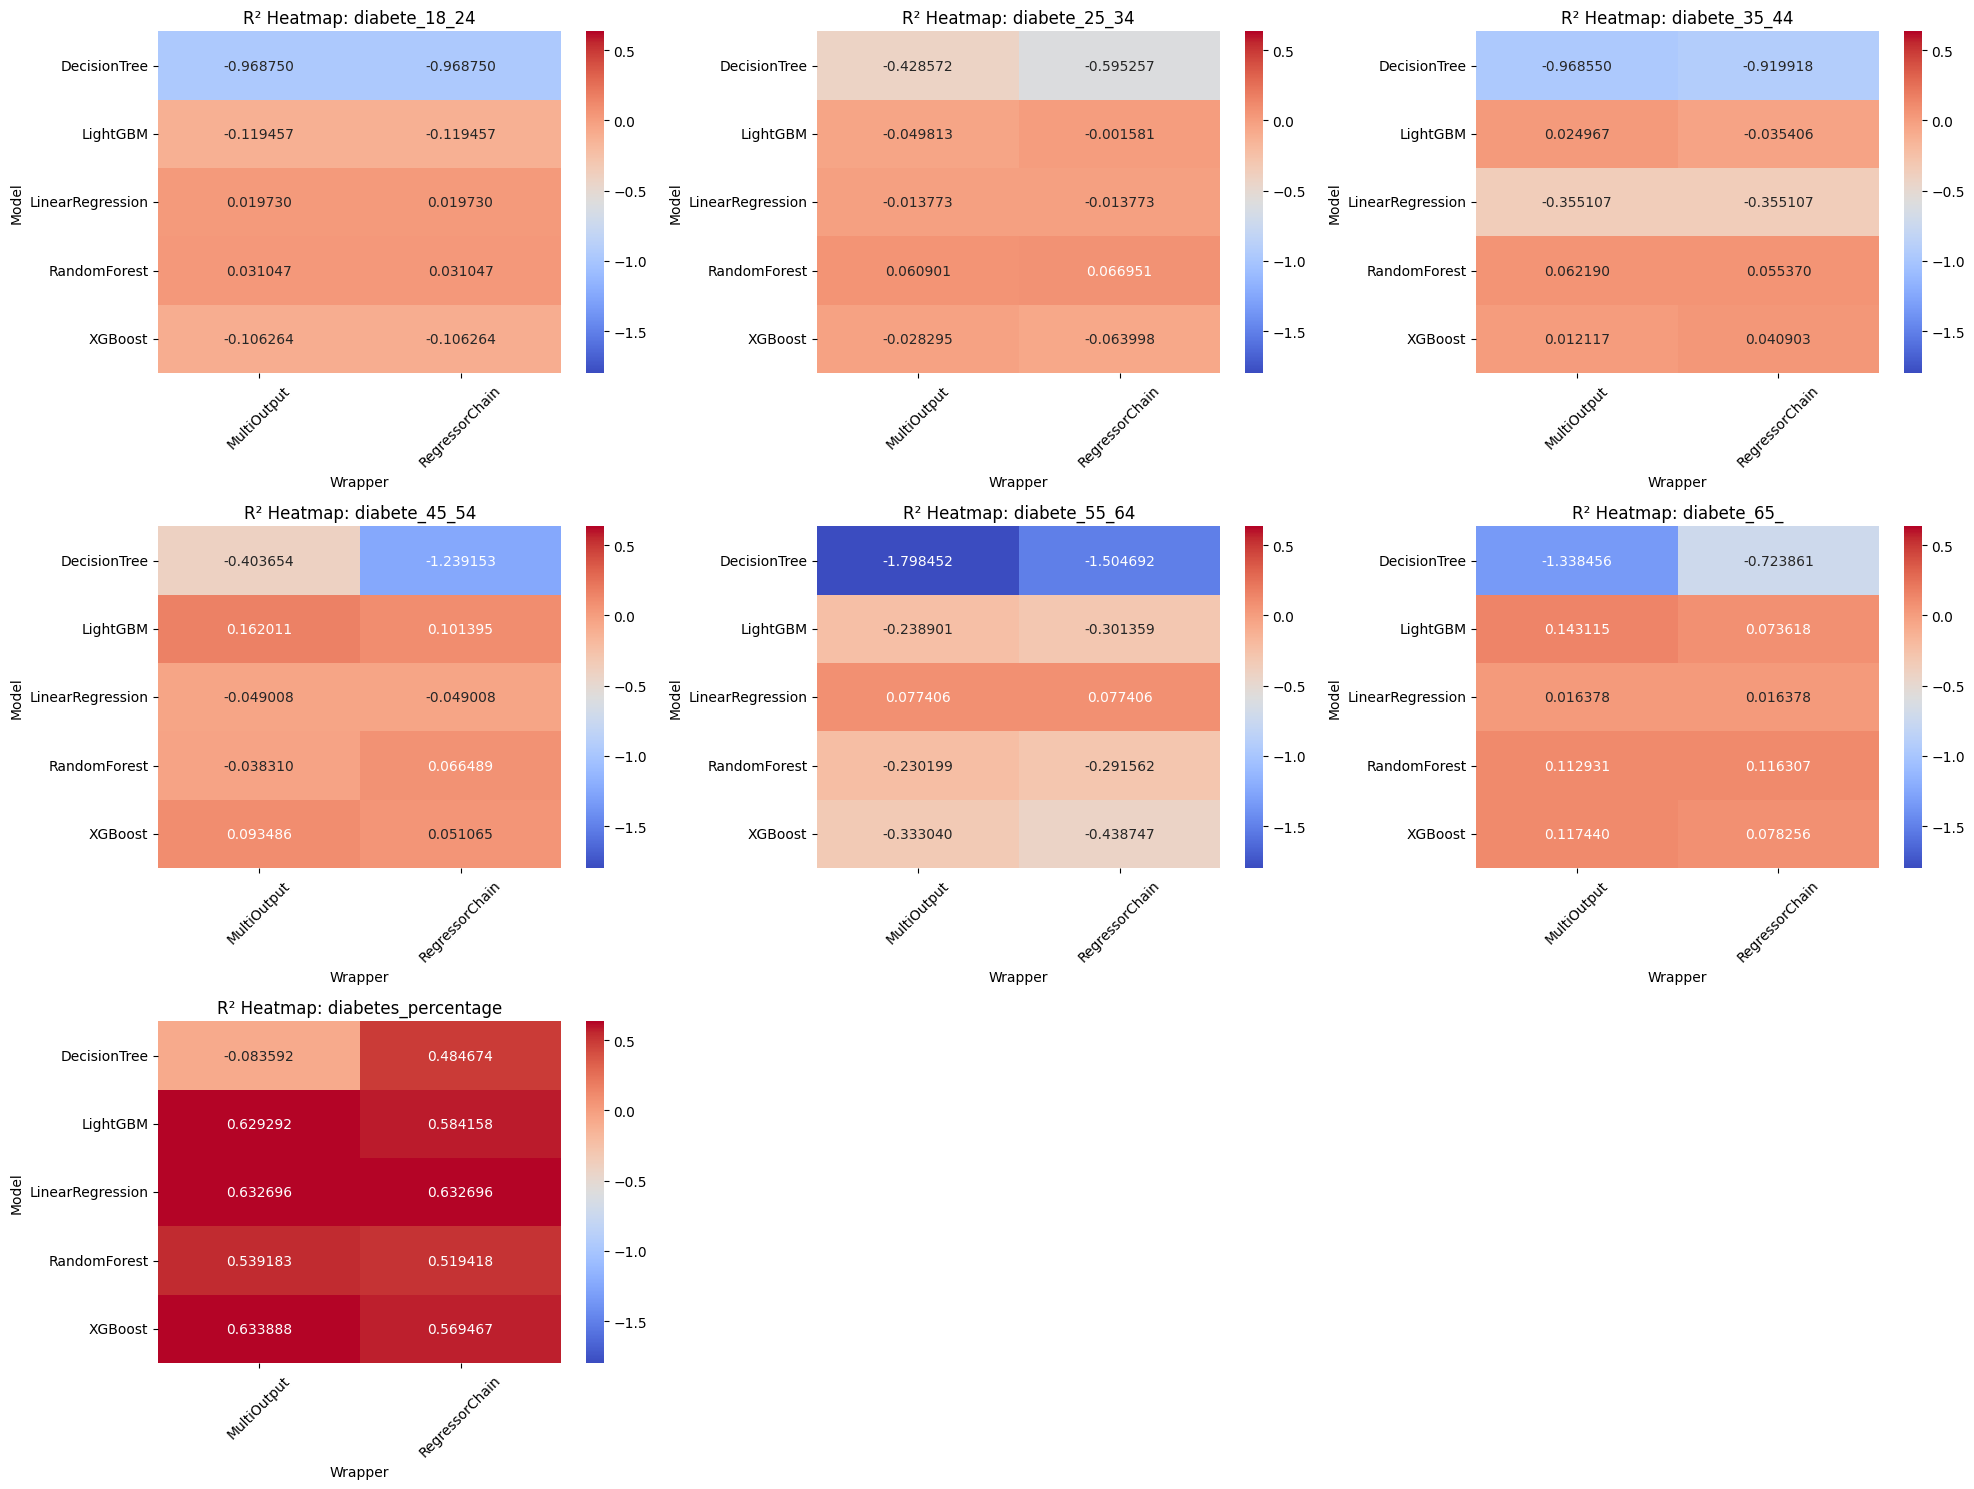

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_targets = len(targets)

global_vmin = results_data["R²"].min()
global_vmax = results_data["R²"].max()

rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

for i, target in enumerate(targets):
    # Calculer la position dans la grille
    row = i // cols
    col = i % cols

    target_data = results_data[results_data["Target"] == target]

    heatmap_data = target_data.pivot(index="Model", columns="Wrapper", values="R²")

    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".6f",
        cmap="coolwarm",
        cbar=True,
        vmin=global_vmin,
        vmax=global_vmax,
        ax=axes[row, col]
    )
    axes[row, col].set_title(f"R² Heatmap: {target}")
    axes[row, col].set_ylabel("Model")
    axes[row, col].set_xlabel("Wrapper")
    axes[row, col].tick_params(axis='x', rotation=45)


for i in range(num_targets, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


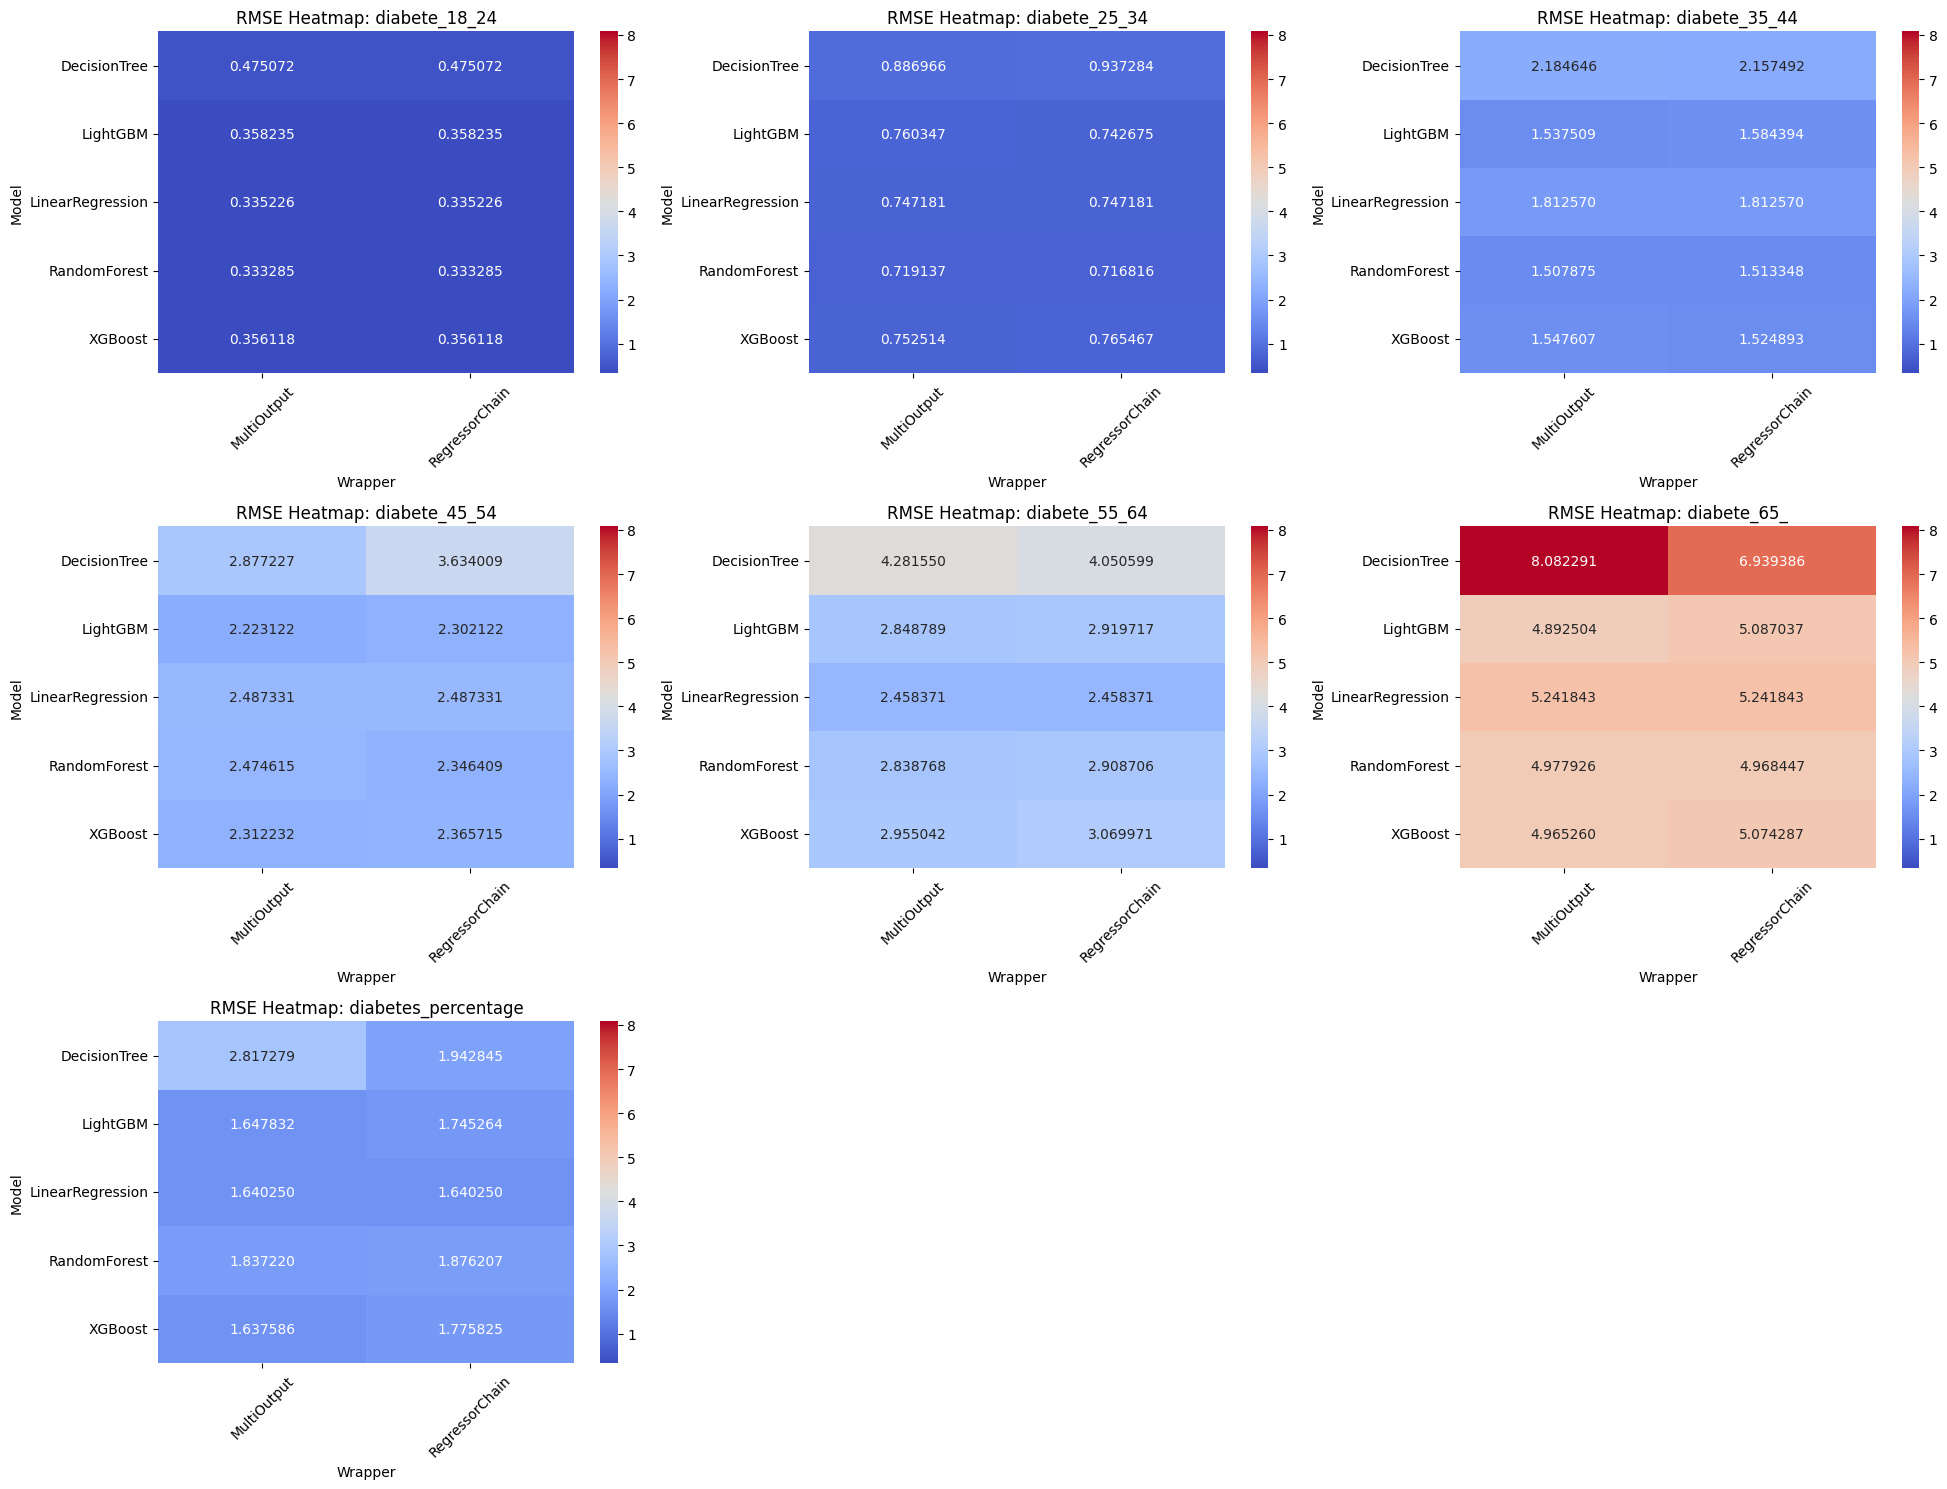

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_targets = len(targets)


global_vmin = results_data["RMSE"].min()
global_vmax = results_data["RMSE"].max()

rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

for i, target in enumerate(targets):
    # Calculer la position dans la grille
    row = i // cols
    col = i % cols

    target_data = results_data[results_data["Target"] == target]


    heatmap_data = target_data.pivot(index="Model", columns="Wrapper", values="RMSE")

    sns.heatmap(
        heatmap_data,
        annot=True,
        fmt=".6f",
        cmap="coolwarm",
        cbar=True,
        vmin=global_vmin,
        vmax=global_vmax,
        ax=axes[row, col]
    )
    axes[row, col].set_title(f"RMSE Heatmap: {target}")
    axes[row, col].set_ylabel("Model")
    axes[row, col].set_xlabel("Wrapper")
    axes[row, col].tick_params(axis='x', rotation=45)


for i in range(num_targets, rows * cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()



À travers les heatmaps, le  MultiOutput montre de bon résultats avec RandomForest. En effet, il ne présente pas des variations extrêmes vers des valeurs négatives de R² et parvient à obtenir des scores R² positifs pour la plupart des cibles, ce qui en fait une option sûre pour notre étude. Les résultats de la métrique RMSE confirment aussi cela.


## Réentraîner le modèle en utilisant une validation croisée

La validation croisée divise les données en plusieurs sous-ensembles (folds), ce qui permet d'entraîner et de tester le modèle sur différentes parties des données. Cela donne une estimation plus précise de sa capacité à généraliser à de nouvelles données.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

In [ ]:
X = train_dataset[features]
y = train_dataset[targets]

model = MultiOutputRegressor(
    RandomForestRegressor(random_state=42, max_depth=10, min_samples_split=2, n_estimators=100)
)

# 5folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


fold_mse = []
fold_rmse = []
fold_mae = []
fold_r2 = []

for train_index, val_index in kfold.split(X):
    # Diviser les données en train et validation
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Entraîner le modèle
    model.fit(X_train, y_train)

    # Prédictions sur l'ensemble de validation
    y_val_pred = model.predict(X_val)

    # Calcul des métriques pour chaque target individuellement
    mse = mean_squared_error(y_val, y_val_pred, multioutput='raw_values')
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_val_pred, multioutput='raw_values')
    r2 = r2_score(y_val, y_val_pred, multioutput='raw_values')

    fold_mse.append(mse)
    fold_rmse.append(rmse)
    fold_mae.append(mae)
    fold_r2.append(r2)

# Moyennes des métriques sur tous les folds
cv_mse_mean = np.mean(fold_mse, axis=0)
cv_rmse_mean = np.mean(fold_rmse, axis=0)
cv_mae_mean = np.mean(fold_mae, axis=0)
cv_r2_mean = np.mean(fold_r2, axis=0)

print("**Résultats Validation Croisée (multi-fold)**")
for i, target in enumerate(targets):
    print(f"{target}: MSE={cv_mse_mean[i]:.4f}, RMSE={cv_rmse_mean[i]:.4f}, MAE={cv_mae_mean[i]:.4f}, R²={cv_r2_mean[i]:.4f}")

**Résultats Validation Croisée (multi-fold)**
diabete_18_24: MSE=0.0778, RMSE=0.2788, MAE=0.2177, R²=-0.0495
diabete_25_34: MSE=0.3946, RMSE=0.6275, MAE=0.4861, R²=0.0252
diabete_35_44: MSE=1.1670, RMSE=1.0772, MAE=0.8461, R²=0.1678
diabete_45_54: MSE=3.3815, RMSE=1.8375, MAE=1.4135, R²=0.2981
diabete_55_64: MSE=5.0835, RMSE=2.2444, MAE=1.7250, R²=0.3331
diabete_65_: MSE=10.4690, RMSE=3.2261, MAE=2.4400, R²=0.5274
diabetes_percentage: MSE=0.8662, RMSE=0.9284, MAE=0.7205, R²=0.8602


### Test

In [ ]:
# Réentraîner le modèle sur l'ensemble complet des données d'entraînement
model.fit(X, y)

X_test = test_dataset[features]
y_test = test_dataset[targets]

y_test_pred = model.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred, multioutput='raw_values')
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred, multioutput='raw_values')
test_r2 = r2_score(y_test, y_test_pred, multioutput='raw_values')

print("\n**Résultats sur les données de test**")
for i, target in enumerate(targets):
    print(f"{target}: MSE={test_mse[i]:.4f}, RMSE={test_rmse[i]:.4f}, MAE={test_mae[i]:.4f}, R²={test_r2[i]:.4f}")



**Résultats sur les données de test**
diabete_18_24: MSE=0.1121, RMSE=0.3348, MAE=0.2468, R²=0.0224
diabete_25_34: MSE=0.5155, RMSE=0.7180, MAE=0.5574, R²=0.0640
diabete_35_44: MSE=2.2644, RMSE=1.5048, MAE=1.1963, R²=0.0660
diabete_45_54: MSE=6.1144, RMSE=2.4727, MAE=1.9792, R²=-0.0367
diabete_55_64: MSE=8.0909, RMSE=2.8445, MAE=2.3163, R²=-0.2351
diabete_65_: MSE=24.6574, RMSE=4.9656, MAE=3.9908, R²=0.1173
diabetes_percentage: MSE=3.2990, RMSE=1.8163, MAE=1.4235, R²=0.5496


On constate que les valeurs de R² sont globalement faibles, et parfois même négatives. Pour mieux comprendre si cette faiblesse provient du modèle lui-même ou des données utilisées, nous allons tester notre modèle sur une autre maladie.

### Importance des Features dans la prédiction : SHAP

SHAP (SHapley Additive exPlanations) est une méthode d'interprétation des modèles d'apprentissage. Elle attribue une importance à chaque feature en mesurant sa contribution au résultat d'une prédiction

Calcul des SHAP values pour la target : diabete_18_24
Calcul des SHAP values pour la target : diabete_25_34
Calcul des SHAP values pour la target : diabete_35_44
Calcul des SHAP values pour la target : diabete_45_54
Calcul des SHAP values pour la target : diabete_55_64
Calcul des SHAP values pour la target : diabete_65_
Calcul des SHAP values pour la target : diabetes_percentage


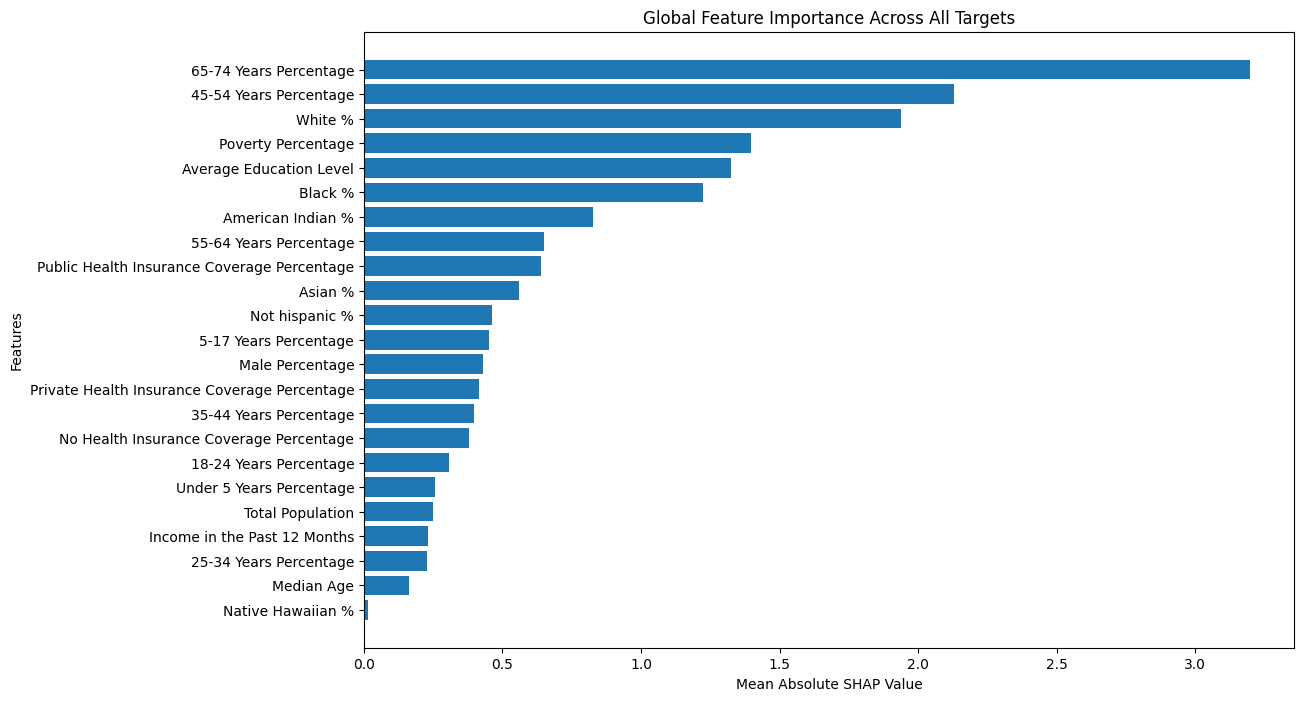

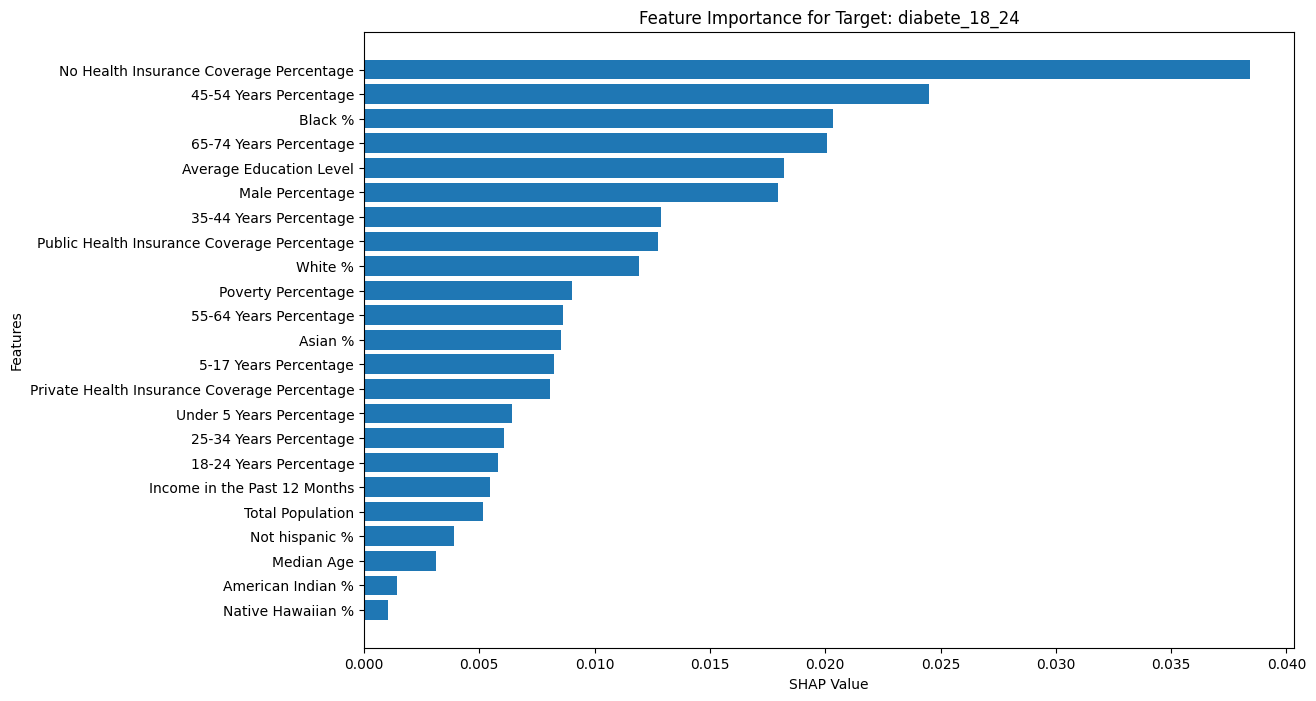

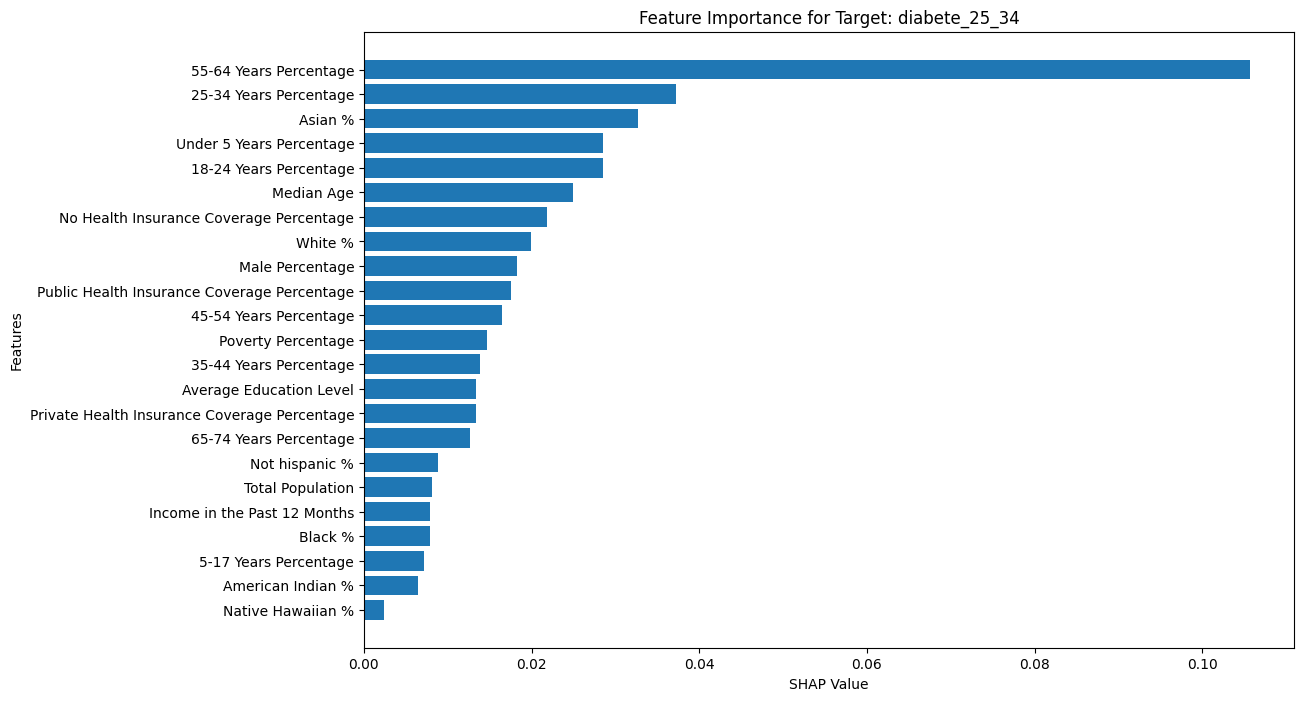

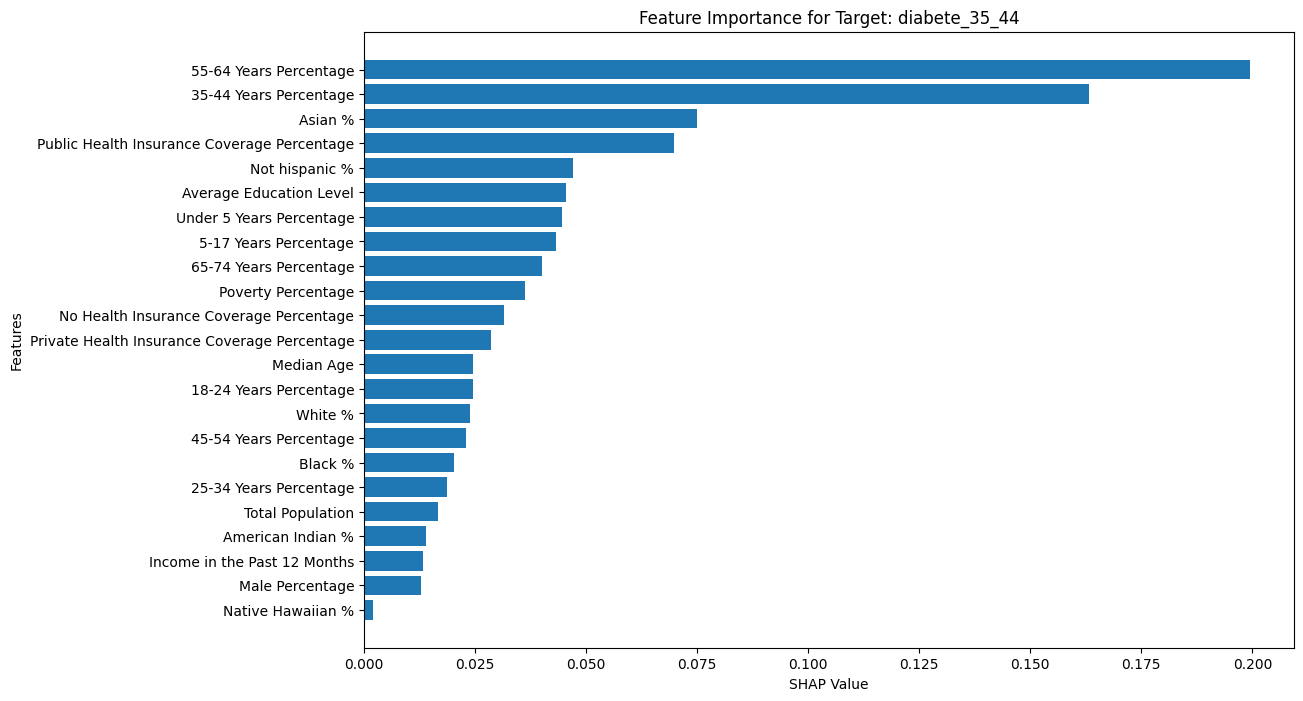

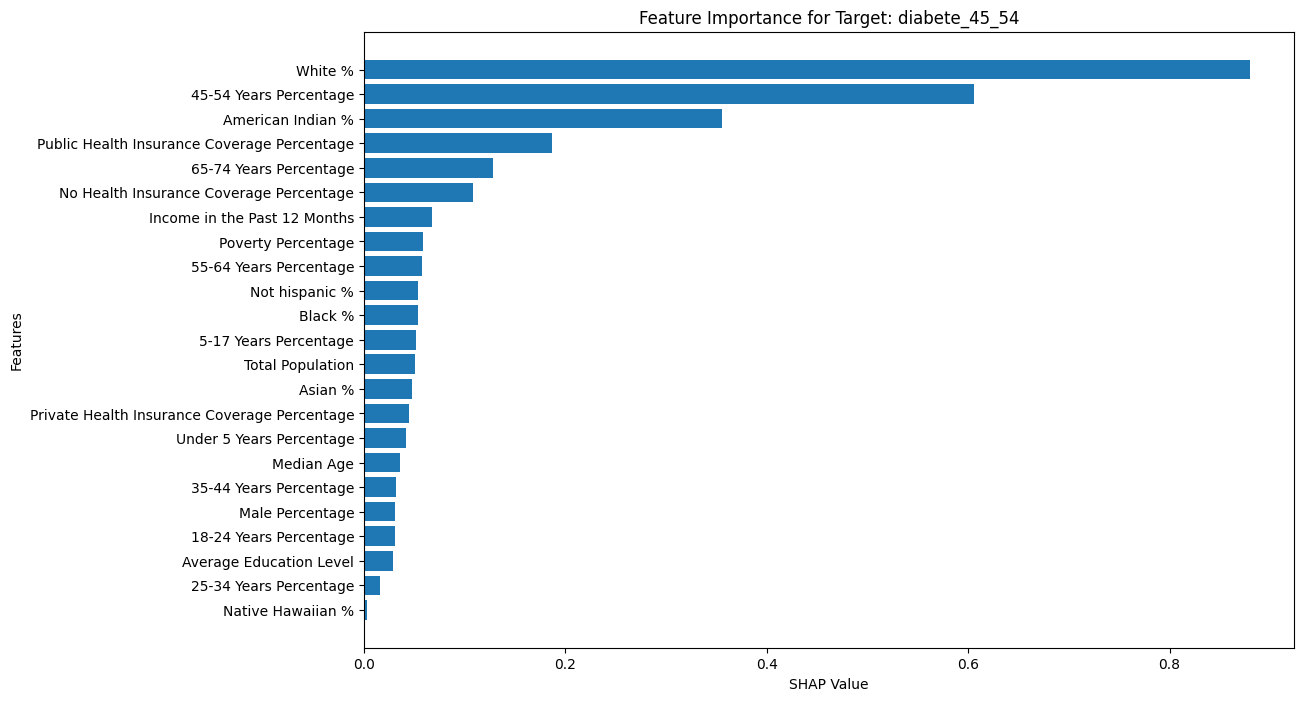

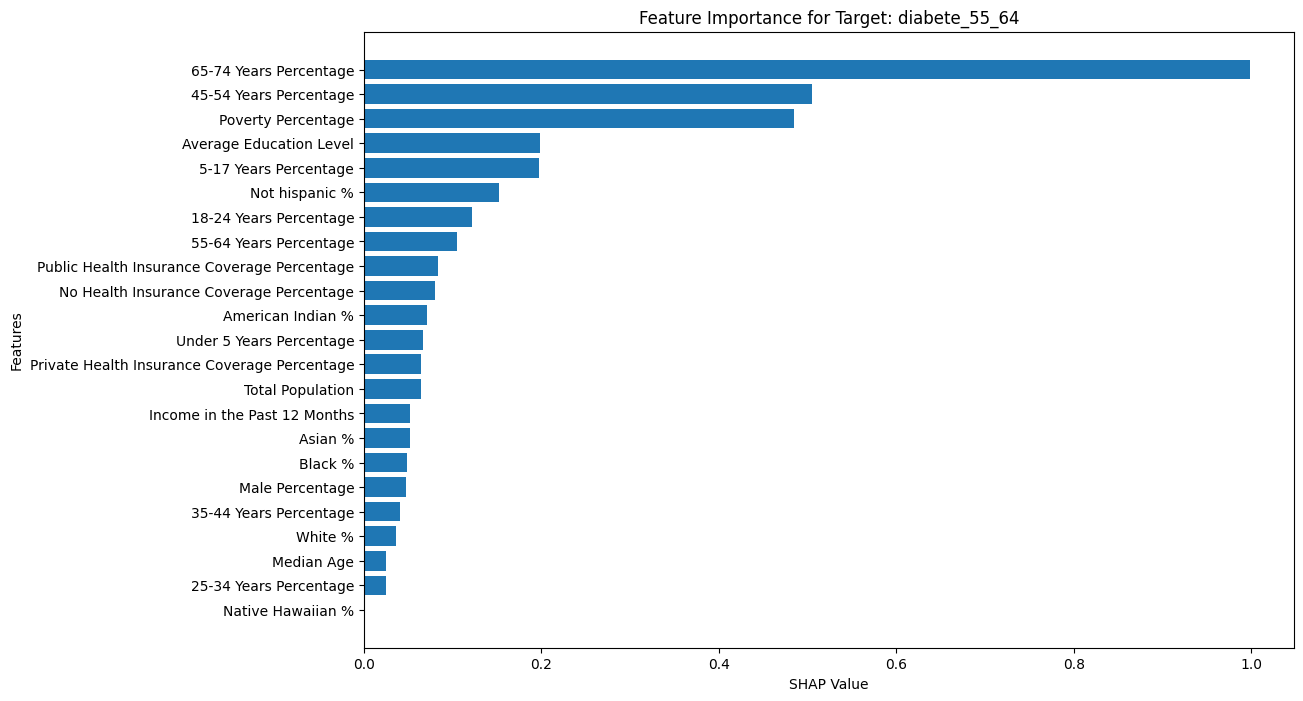

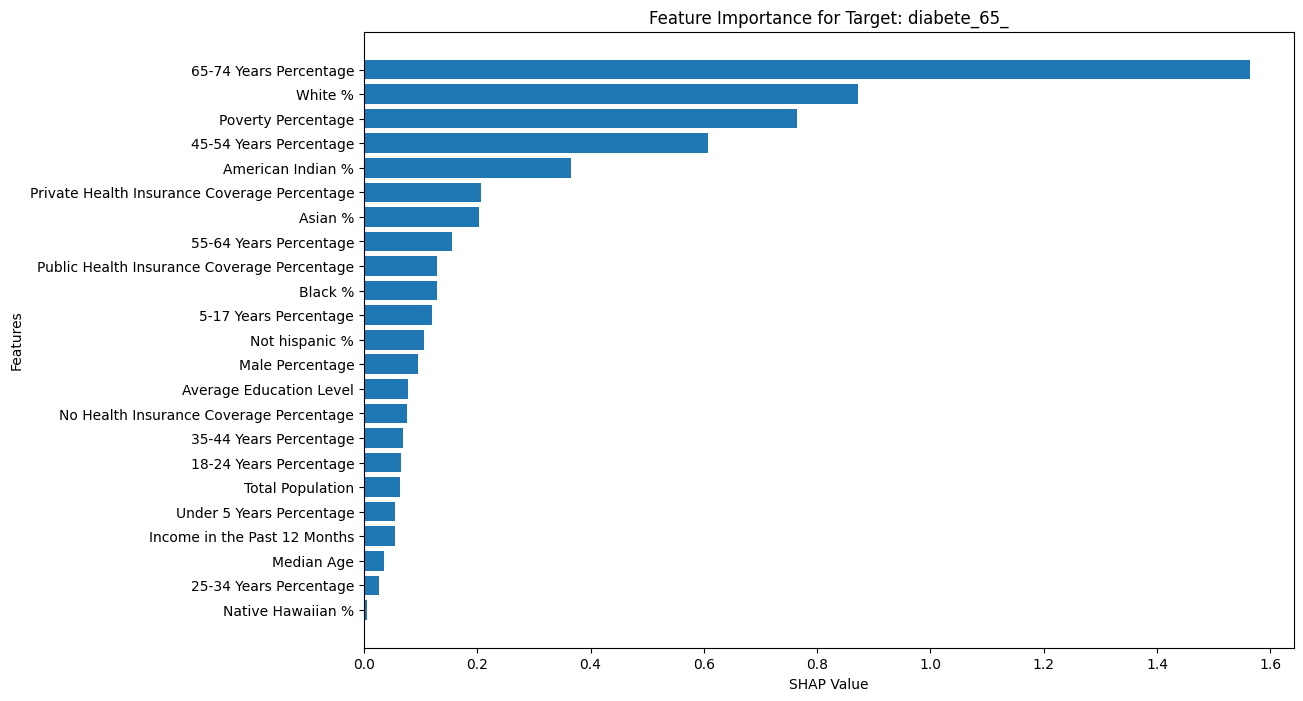

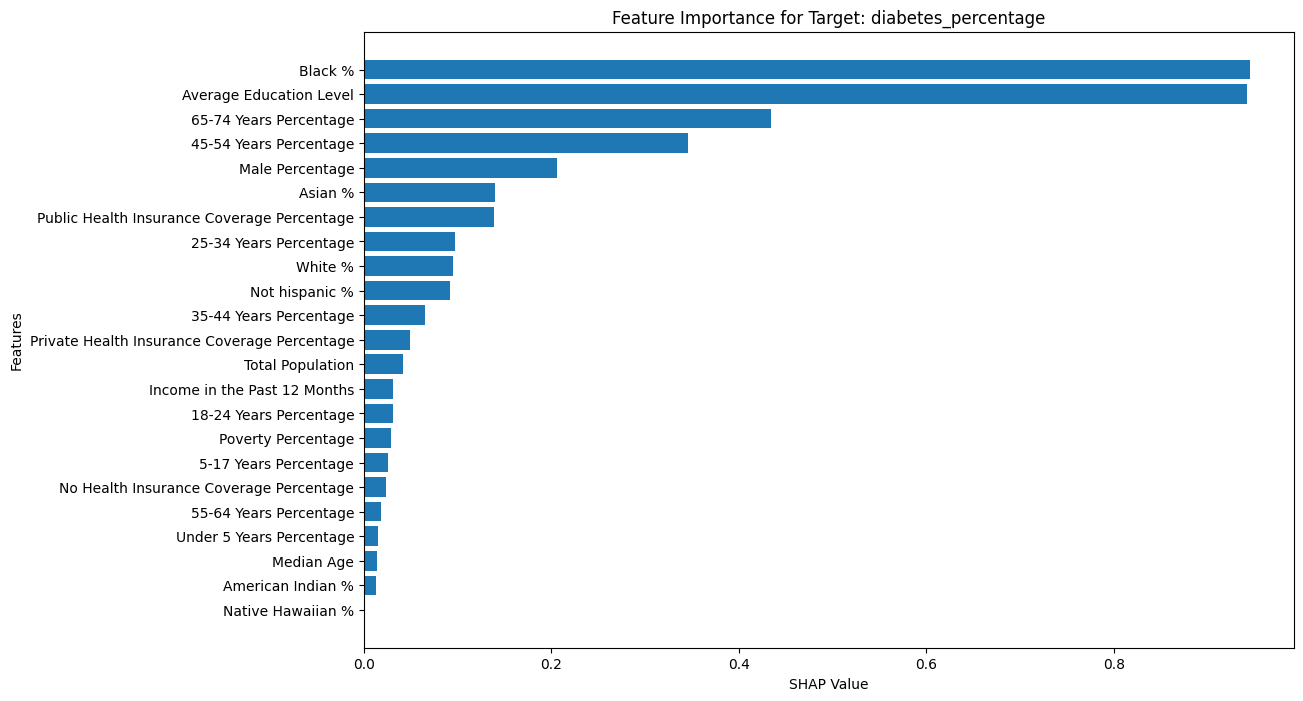

In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


global_shap_values = np.zeros((X_test.shape[0], len(features)))


shap_values_per_target = {}


for i, target in enumerate(targets):
    print(f"Calcul des SHAP values pour la target : {target}")


    explainer = shap.TreeExplainer(model.estimators_[i])


    shap_values = explainer.shap_values(X_test)


    global_shap_values += np.abs(shap_values)


    shap_values_per_target[target] = np.abs(shap_values).mean(axis=0)

# Moyenne des valeurs SHAP globales
mean_shap_values = global_shap_values.mean(axis=0)


global_feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": mean_shap_values
}).sort_values(by="Importance", ascending=False)


# Visualiser les features les plus importantes globalement
plt.figure(figsize=(12, 8))
plt.barh(global_feature_importance_df["Feature"], global_feature_importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Global Feature Importance Across All Targets")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Features")
plt.show()

# Visualiser les contributions des features pour chaque target
for target, shap_values_mean in shap_values_per_target.items():

    target_feature_importance_df = pd.DataFrame({
        "Feature": features,
        "Importance": shap_values_mean
    }).sort_values(by="Importance", ascending=False)



    plt.figure(figsize=(12, 8))
    plt.barh(target_feature_importance_df["Feature"], target_feature_importance_df["Importance"])
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance for Target: {target}")
    plt.xlabel("SHAP Value")
    plt.ylabel("Features")
    plt.show()


# Génération de colonnes obésité par tranche d'âge

In [ ]:
# Définir les tranches d'âge
age_labels = {
    1: '18_24',
    2: '25_34',
    3: '35_44',
    4: '45_54',
    5: '55_64',
    6: '65_'
}


In [ ]:
tables = [m10, m11, m12, m13, m14, m15, m16, m17, m18, m19]
years = list(range(2010, 2020))

results = []

for table, year in zip(tables, years):

    table['AGE_GROUP_LABEL'] = table['AGE_GROUP'].map(age_labels)

    obesity_cases = table[table['obesity'] == 1]

    age_group_counts = (
        obesity_cases
        .groupby(['STATE_CODE', 'AGE_GROUP_LABEL'])
        .size()
        .reset_index(name='count')
    )

    state_totals = (
        obesity_cases
        .groupby('STATE_CODE')
        .size()
        .reset_index(name='total')
    )

    merged = pd.merge(age_group_counts, state_totals, on='STATE_CODE')

    merged['percentage'] = (merged['count'] / merged['total']) * 100

    result_age = merged.pivot(index='STATE_CODE', columns='AGE_GROUP_LABEL', values='percentage').fillna(0)

    result_age.columns = [f'obesity_{col}' for col in result_age.columns]
    result_age = result_age.reset_index()

    # Ajout d'une colonne obesity_percentage
    result_age['obesity_percentage'] = (
        state_totals.set_index('STATE_CODE')['total'] / table.groupby('STATE_CODE')['obesity'].count() * 100
    ).reindex(result_age['STATE_CODE']).values

    result_age['Geographic Area'] = result_age['STATE_CODE'].map(state_dict)

    result_age['Year'] = year

    results.append(result_age)


train_obesity = pd.concat(results, ignore_index=True)

In [ ]:
train_obesity.head()

,STATE_CODE,obesity_18_24,obesity_25_34,obesity_35_44,obesity_45_54,obesity_55_64,obesity_65_,obesity_percentage,Geographic Area,Year
0,1.0,1.946667,8.586667,14.560000,20.933333,24.026667,29.946667,71.130501,Alabama,2010
1,2.0,2.470356,14.031621,18.478261,26.976285,24.604743,13.438735,69.841270,Alaska,2010
2,4.0,1.486346,6.636709,11.406844,17.836156,25.406153,37.227791,64.880018,Arizona,2010
3,5.0,1.552644,6.016497,11.644833,18.874333,26.540514,35.371179,69.604863,Arkansas,2010
4,6.0,2.592552,9.776997,15.566297,20.322970,23.025376,28.715808,61.719439,California,2010


In [ ]:
tables = [m21, m22, m23]
years = list(range(2021, 2024))

results = []

for table, year in zip(tables, years):

    table['AGE_GROUP_LABEL'] = table['AGE_GROUP'].map(age_labels)

    obesity_cases = table[table['obesity'] == 1]

    age_group_counts = (
        obesity_cases
        .groupby(['STATE_CODE', 'AGE_GROUP_LABEL'])
        .size()
        .reset_index(name='count')
    )

    state_totals = (
        obesity_cases
        .groupby('STATE_CODE')
        .size()
        .reset_index(name='total')
    )

    merged = pd.merge(age_group_counts, state_totals, on='STATE_CODE')

    merged['percentage'] = (merged['count'] / merged['total']) * 100

    result_age = merged.pivot(index='STATE_CODE', columns='AGE_GROUP_LABEL', values='percentage').fillna(0)

    result_age.columns = [f'obesity_{col}' for col in result_age.columns]
    result_age = result_age.reset_index()

    # Ajout d'une colonne obesity_percentage
    result_age['obesity_percentage'] = (
        state_totals.set_index('STATE_CODE')['total'] / table.groupby('STATE_CODE')['obesity'].count() * 100
    ).reindex(result_age['STATE_CODE']).values

    result_age['Geographic Area'] = result_age['STATE_CODE'].map(state_dict)

    result_age['Year'] = year

    results.append(result_age)

test_obesity = pd.concat(results, ignore_index=True)

In [ ]:
test_obesity.head()

,STATE_CODE,obesity_18_24,obesity_25_34,obesity_35_44,obesity_45_54,obesity_55_64,obesity_65_,obesity_percentage,Geographic Area,Year
0,1.0,3.333333,10.219298,14.473684,16.842105,21.052632,34.078947,74.291300,Alabama,2021
1,2.0,3.567319,11.545838,15.074799,17.759877,22.401227,29.650940,69.427430,Alaska,2021
2,4.0,3.800995,9.114428,14.646766,17.850746,20.298507,34.288557,68.591319,Arizona,2021
3,5.0,2.774275,5.716688,9.920135,12.820513,20.428752,48.339639,70.845742,Arkansas,2021
4,6.0,6.439964,14.053566,17.032802,16.882335,19.921757,25.669576,65.633024,California,2021


### to csv

In [ ]:
train_obesity.to_csv('train_obesity.csv', index=False)
test_obesity.to_csv('test_obesity.csv', index=False)

## Fusionner ACS et obesity_

In [ ]:
train_dataset_ = pd.merge(
    train_acs,
    train_obesity,
    on=['Geographic Area', 'Year'],
    how='inner'  # 'inner' : uniquement les lignes présentes dans les deux datasets
)


test_dataset_ = pd.merge(
    test_acs,
    test_obesity,
    on=['Geographic Area', 'Year'],
    how='inner'  # 'inner' : uniquement les lignes présentes dans les deux datasets
)

### to csv

In [ ]:
train_dataset_.to_csv('train_dataset_.csv', index=False)
test_dataset_.to_csv('test_dataset_.csv', index=False)

## Modèle d'apprentissage

In [ ]:

features = [
    "Total Population", "Male Percentage",
    "Under 5 Years Percentage", "5-17 Years Percentage",
    "18-24 Years Percentage", "25-34 Years Percentage", '35-44 Years Percentage','45-54 Years Percentage', '55-64 Years Percentage', '65-74 Years Percentage',
    "Median Age", "Income in the Past 12 Months", "Poverty Percentage",
    'Average Education Level',
    'No Health Insurance Coverage Percentage', 'Public Health Insurance Coverage Percentage','Private Health Insurance Coverage Percentage',
    'White %', 'Black %', 'Asian %', 'American Indian %', 'Native Hawaiian %','Not hispanic %'
]

targets_ob = ["obesity_18_24", "obesity_25_34", "obesity_35_44",
           "obesity_45_54", "obesity_55_64", "obesity_65_", "obesity_percentage"]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X = train_dataset_[features]
y = train_dataset_[targets_ob]

model_ = MultiOutputRegressor(
    RandomForestRegressor(random_state=42, max_depth=10, min_samples_split=2, n_estimators=100)
)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

fold_mse = []
fold_rmse = []
fold_mae = []
fold_r2 = []

for train_index, val_index in kfold.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model_.fit(X_train, y_train)

    y_val_pred = model_.predict(X_val)

    # Calcul des métriques pour chaque target individuellement
    mse = mean_squared_error(y_val, y_val_pred, multioutput='raw_values')
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_val_pred, multioutput='raw_values')
    r2 = r2_score(y_val, y_val_pred, multioutput='raw_values')

    fold_mse.append(mse)
    fold_rmse.append(rmse)
    fold_mae.append(mae)
    fold_r2.append(r2)

# Moyennes des métriques sur tous les folds
cv_mse_mean = np.mean(fold_mse, axis=0)
cv_rmse_mean = np.mean(fold_rmse, axis=0)
cv_mae_mean = np.mean(fold_mae, axis=0)
cv_r2_mean = np.mean(fold_r2, axis=0)

print("**Résultats Validation Croisée (multi-fold)**")
for i, target in enumerate(targets):
    print(f"{target}: MSE={cv_mse_mean[i]:.4f}, RMSE={cv_rmse_mean[i]:.4f}, MAE={cv_mae_mean[i]:.4f}, R²={cv_r2_mean[i]:.4f}")

**Résultats Validation Croisée (multi-fold)**
obesity_18_24: MSE=0.3536, RMSE=0.5934, MAE=0.4706, R²=0.5648
obesity_25_34: MSE=1.4924, RMSE=1.2145, MAE=0.9636, R²=0.5652
obesity_35_44: MSE=1.3411, RMSE=1.1536, MAE=0.8977, R²=0.6106
obesity_45_54: MSE=1.0478, RMSE=1.0196, MAE=0.8013, R²=0.7591
obesity_55_64: MSE=1.2851, RMSE=1.1316, MAE=0.8938, R²=0.6152
obesity_65_: MSE=7.8259, RMSE=2.7835, MAE=2.1472, R²=0.6078
obesity_percentage: MSE=1.7144, RMSE=1.3063, MAE=1.0316, R²=0.8797


In [ ]:
# Réentraîner le modèle sur l'ensemble complet des données d'entraînement
model_.fit(X, y)


X_test = test_dataset_[features]
y_test = test_dataset_[targets_ob]

y_test_pred = model_.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred, multioutput='raw_values')
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred, multioutput='raw_values')
test_r2 = r2_score(y_test, y_test_pred, multioutput='raw_values')

print("\n**Résultats sur les données de test**")
for i, target in enumerate(targets):
    print(f"{target}: MSE={test_mse[i]:.4f}, RMSE={test_rmse[i]:.4f}, MAE={test_mae[i]:.4f}, R²={test_r2[i]:.4f}")



**Résultats sur les données de test**
obesity_18_24: MSE=0.5657, RMSE=0.7521, MAE=0.5572, R²=0.3529
obesity_25_34: MSE=3.0393, RMSE=1.7434, MAE=1.4046, R²=0.3216
obesity_35_44: MSE=4.0367, RMSE=2.0092, MAE=1.5990, R²=0.1942
obesity_45_54: MSE=2.1449, RMSE=1.4646, MAE=1.2208, R²=0.0923
obesity_55_64: MSE=4.3577, RMSE=2.0875, MAE=1.7227, R²=-0.6669
obesity_65_: MSE=22.1780, RMSE=4.7094, MAE=3.6950, R²=0.2207
obesity_percentage: MSE=12.9801, RMSE=3.6028, MAE=2.7611, R²=0.1793


On remarque une amélioration notable des métriques pour l'obésité (notamment le R²) par rapport au diabète, ce qui pourrait indiquer que les données sont:

-  plus homogènes pour cette cible.
- Mieux corrélées avec les variables explicatives utilisées par le modèle.

Cependant, la tranche d'âge 55-64 ans demeure difficile à prédire pour les deux maladies. Cela pourrait être attribué à la nature des données elles-mêmes.


### Importance des Features dans la prédiction : SHAP

SHAP (SHapley Additive exPlanations) est une méthode d'interprétation des modèles d'apprentissage. Elle attribue une importance à chaque feature en mesurant sa contribution au résultat d'une prédiction

Calcul des SHAP values pour la target : obesity_18_24
Calcul des SHAP values pour la target : obesity_25_34
Calcul des SHAP values pour la target : obesity_35_44
Calcul des SHAP values pour la target : obesity_45_54
Calcul des SHAP values pour la target : obesity_55_64
Calcul des SHAP values pour la target : obesity_65_
Calcul des SHAP values pour la target : obesity_percentage


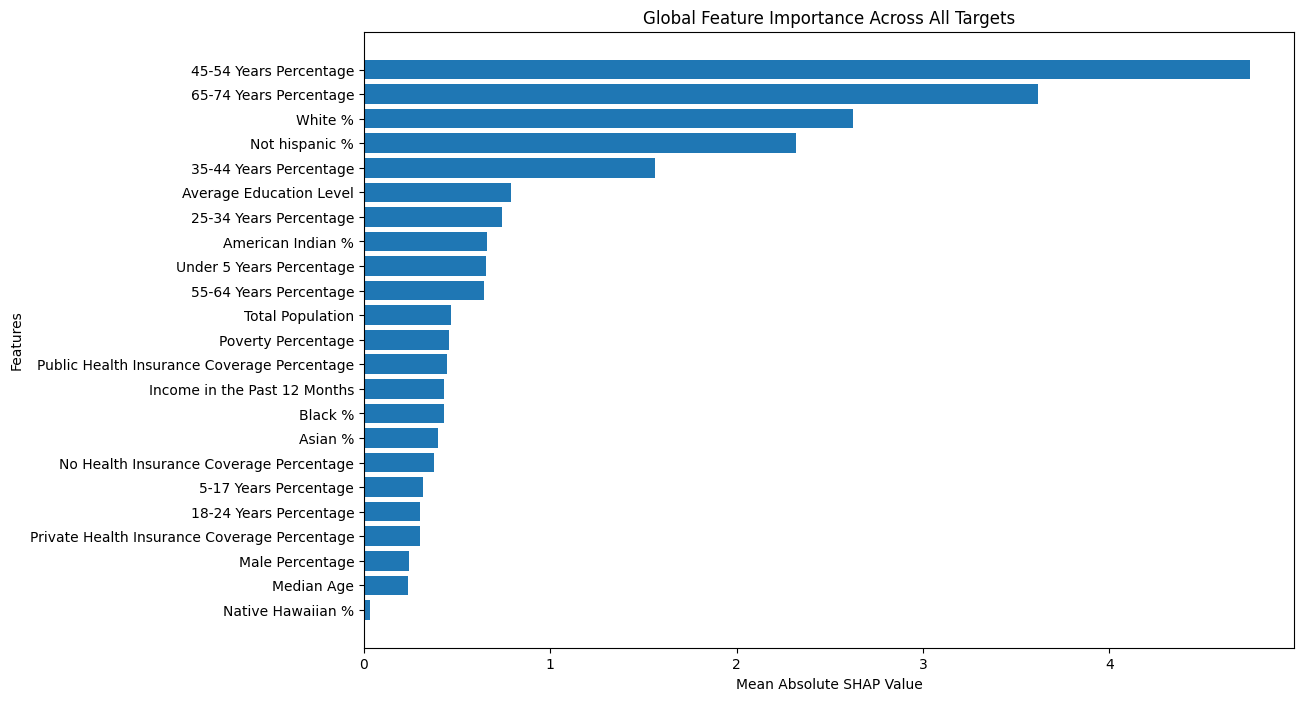

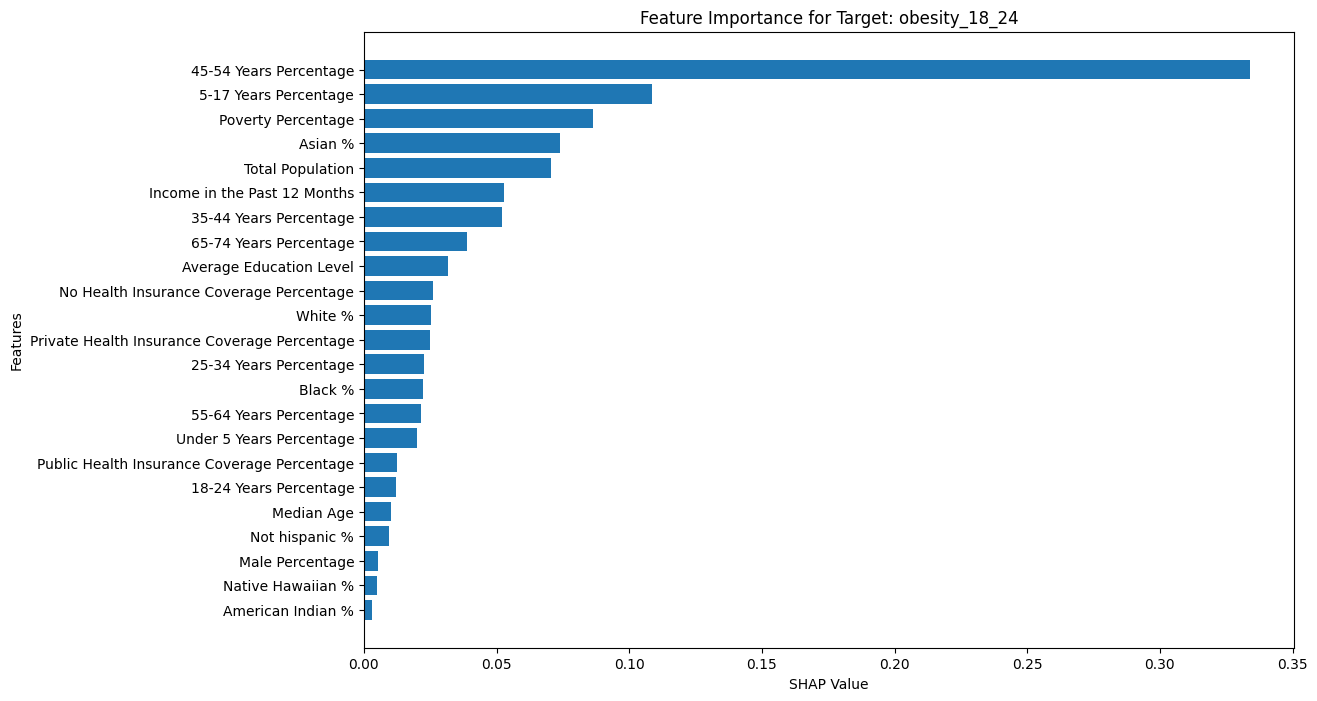

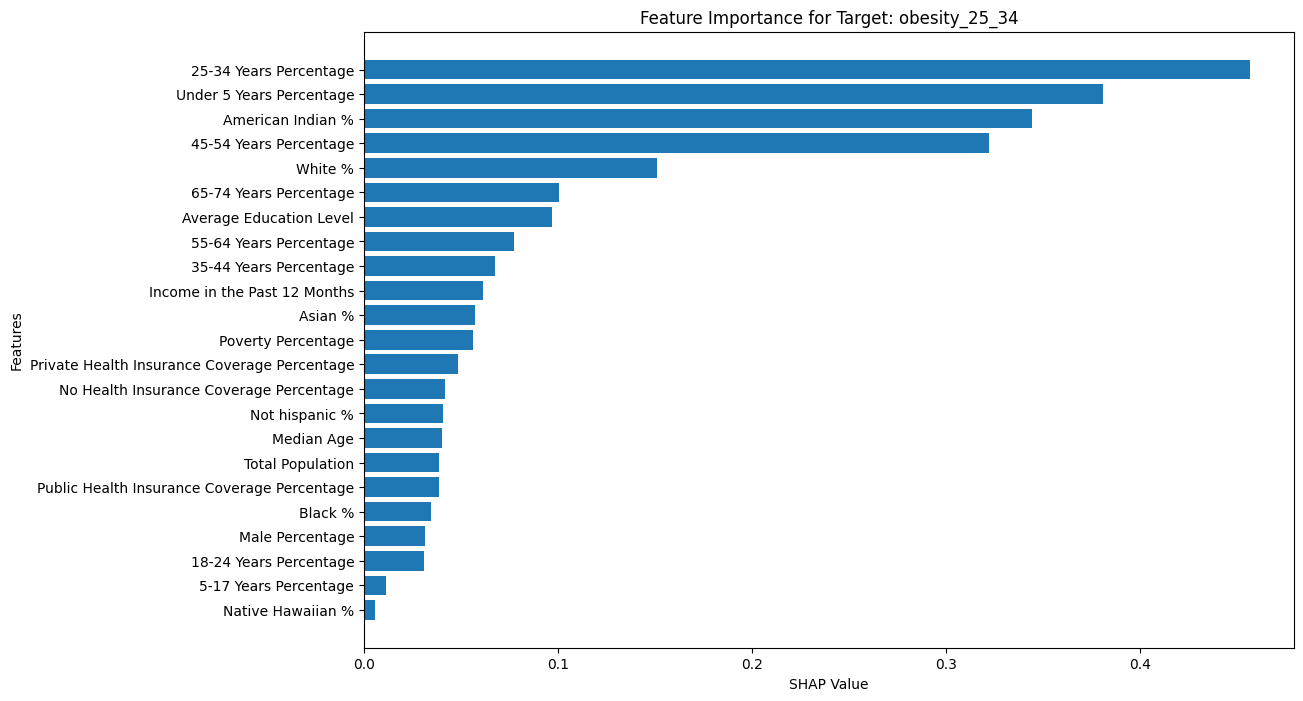

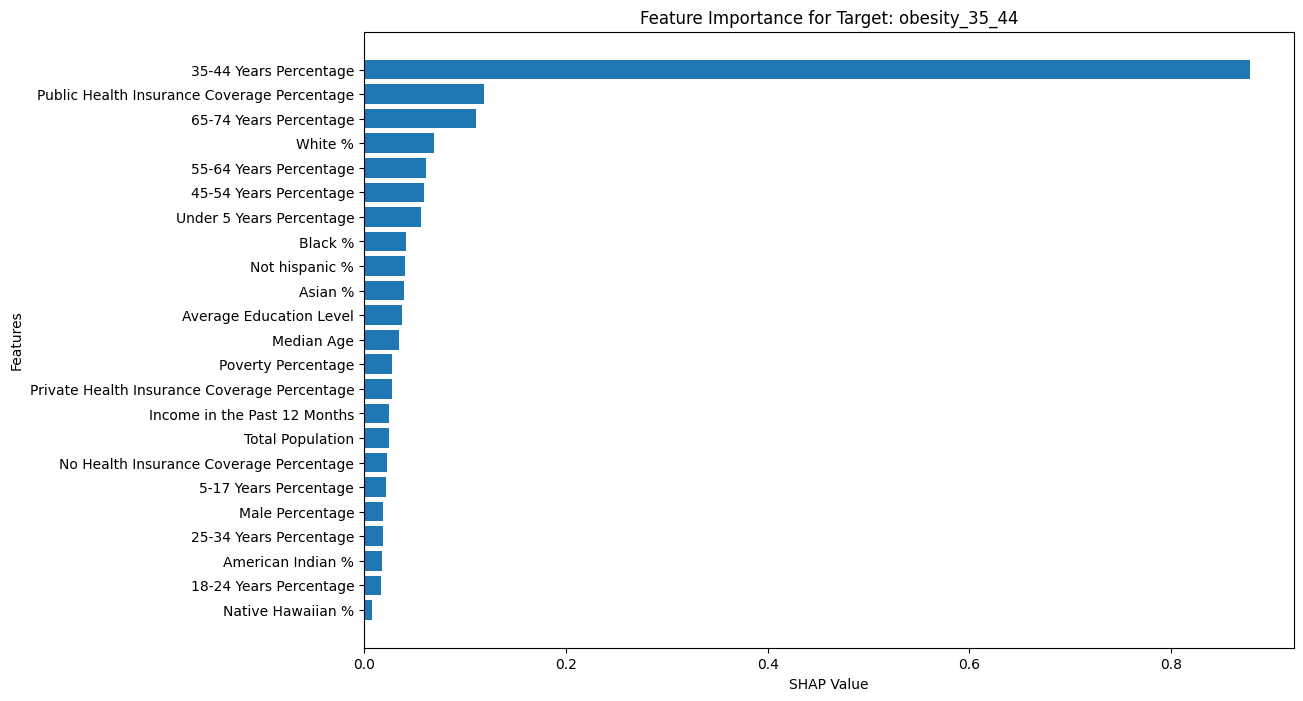

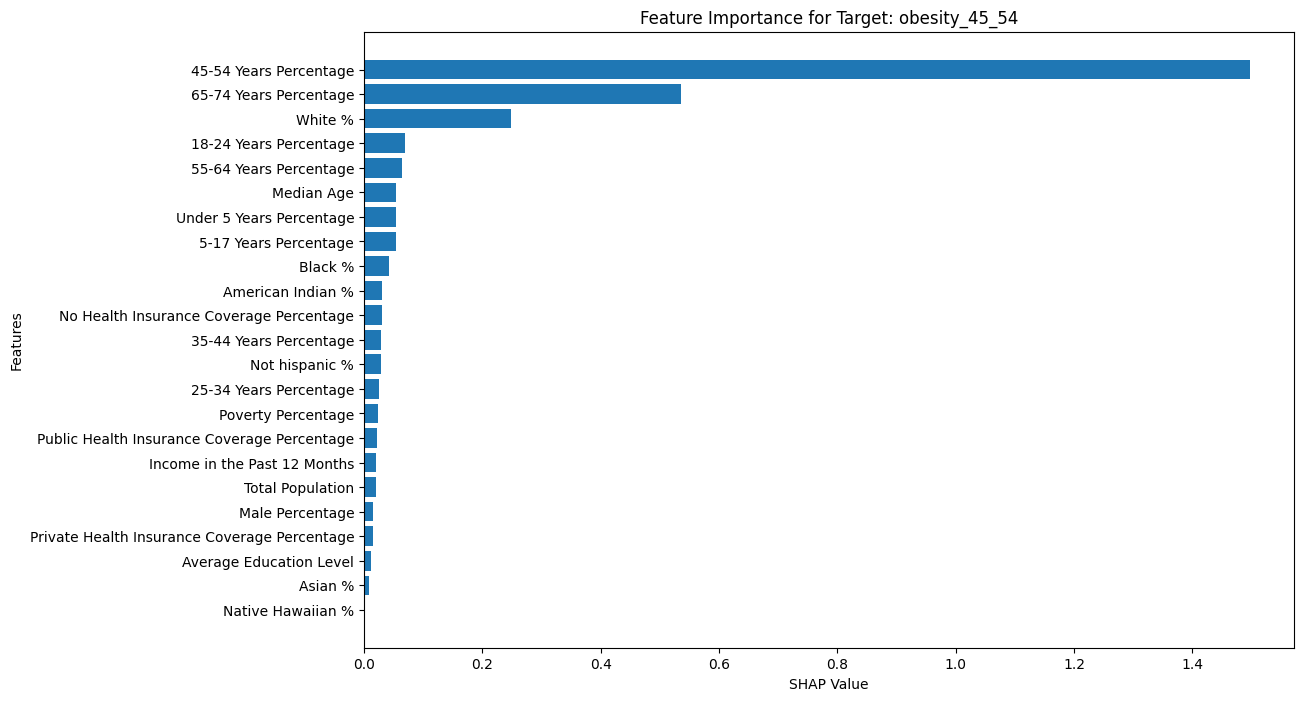

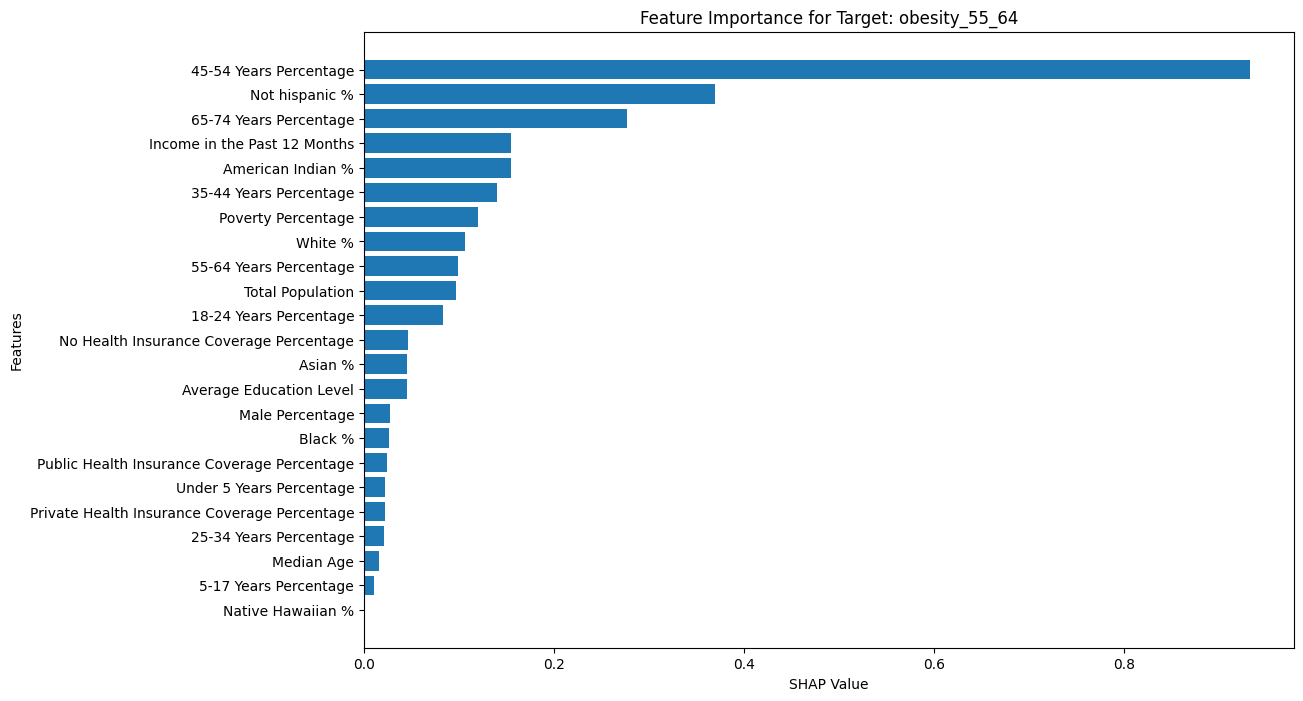

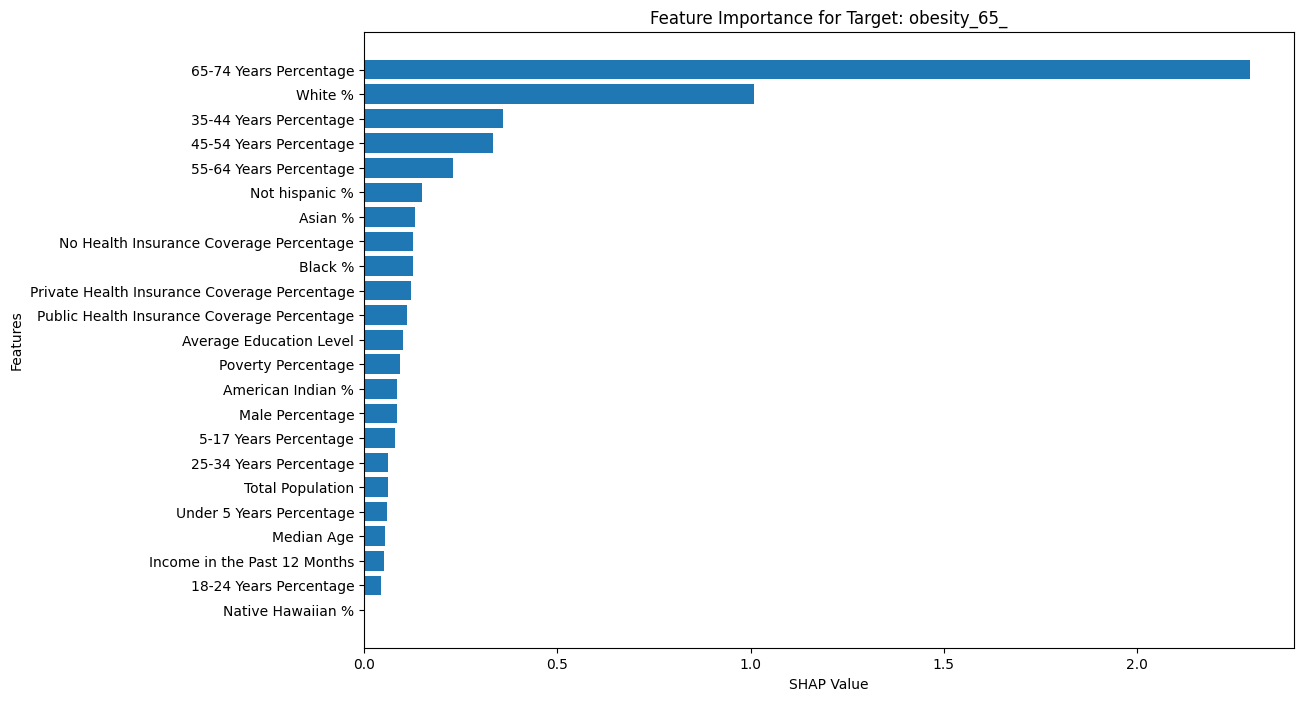

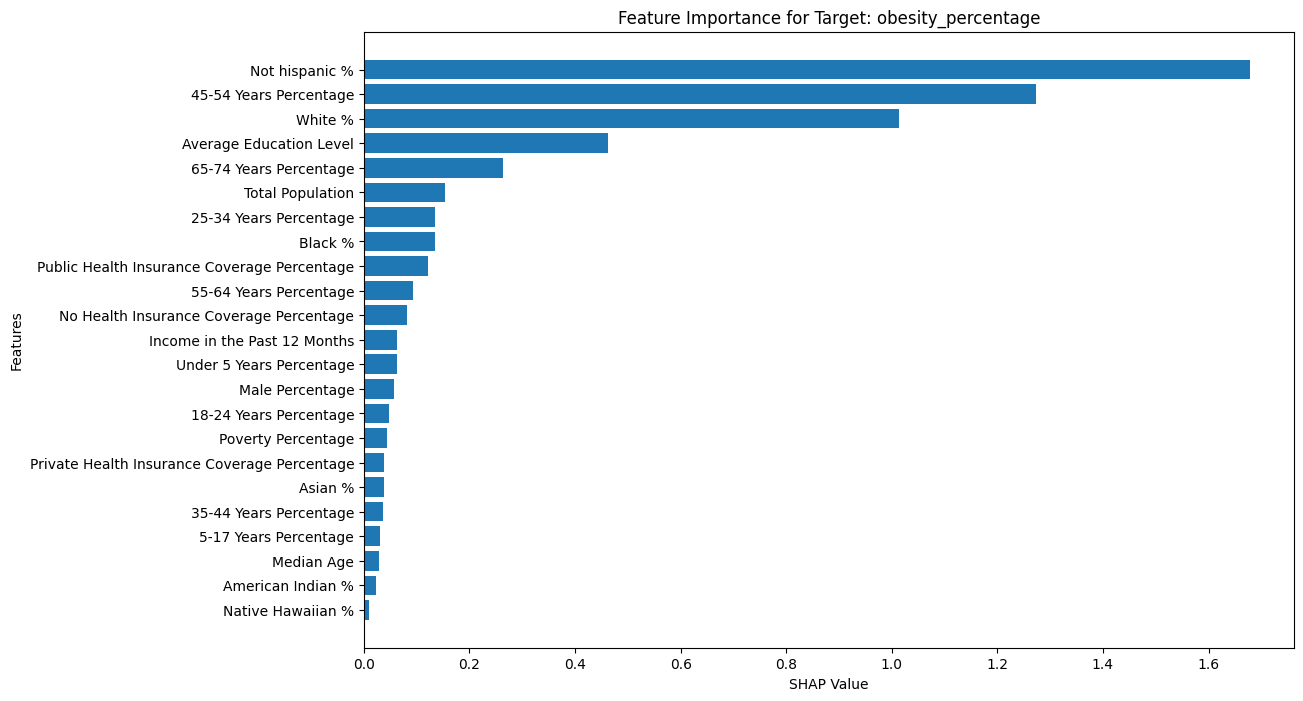

In [ ]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


global_shap_values = np.zeros((X_test.shape[0], len(features)))


shap_values_per_target = {}


for i, target in enumerate(targets_ob):
    print(f"Calcul des SHAP values pour la target : {target}")


    explainer = shap.TreeExplainer(model_.estimators_[i])


    shap_values = explainer.shap_values(X_test)


    global_shap_values += np.abs(shap_values)


    shap_values_per_target[target] = np.abs(shap_values).mean(axis=0)

# Moyenne des valeurs SHAP globales
mean_shap_values = global_shap_values.mean(axis=0)


global_feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": mean_shap_values
}).sort_values(by="Importance", ascending=False)


# Visualiser les features les plus importantes globalement
plt.figure(figsize=(12, 8))
plt.barh(global_feature_importance_df["Feature"], global_feature_importance_df["Importance"])
plt.gca().invert_yaxis()
plt.title("Global Feature Importance Across All Targets")
plt.xlabel("Mean Absolute SHAP Value")
plt.ylabel("Features")
plt.show()

# Visualiser les contributions des features pour chaque target
for target, shap_values_mean in shap_values_per_target.items():

    target_feature_importance_df = pd.DataFrame({
        "Feature": features,
        "Importance": shap_values_mean
    }).sort_values(by="Importance", ascending=False)



    plt.figure(figsize=(12, 8))
    plt.barh(target_feature_importance_df["Feature"], target_feature_importance_df["Importance"])
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance for Target: {target}")
    plt.xlabel("SHAP Value")
    plt.ylabel("Features")
    plt.show()


# Décideur : "Campagnes de Sensibilisation ciblées"

Supposons qu'un **décideur** se trouve en **2022** et qu'il essaie de prédire l'évolution du **diabète** pour l'année **2023**.

In [ ]:
dataset_22 = test_dataset[test_dataset['Year'] == 2022]

dataset_23 = test_dataset[test_dataset['Year'] == 2023]

## Prédiction de 2023

In [ ]:
X_train_23 = dataset_23[features]

y_pred_23 = model.predict(X_train_23)

In [ ]:
y_pred_23_df = pd.DataFrame({'Geographic Area': dataset_23['Geographic Area']})

columns = targets

y_pred_23_df[columns] = y_pred_23

y_pred_23_df.head()

,Geographic Area,diabete_18_24,diabete_25_34,diabete_35_44,diabete_45_54,diabete_55_64,diabete_65_,diabetes_percentage
97,Alabama,0.359463,1.624976,5.599151,14.972925,26.220310,51.251412,16.027789
98,Alaska,0.371418,1.922755,5.272447,13.446827,25.714167,52.215594,13.983724
99,Arizona,0.396682,1.831633,5.315649,13.362978,25.125476,52.908673,12.941550
100,Arkansas,0.374219,1.599674,5.204943,15.743813,23.313335,54.381445,16.523340
101,California,0.697827,2.412505,6.084057,15.555068,26.270410,48.974277,10.871376


## Evolution de 2023 par rapport à 2022

In [ ]:
y_22_df = pd.DataFrame({'Geographic Area': dataset_22['Geographic Area']})

y_22_df[targets] = dataset_22[targets]

y_22_df.head()

,Geographic Area,diabete_18_24,diabete_25_34,diabete_35_44,diabete_45_54,diabete_55_64,diabete_65_,diabetes_percentage
48,Alabama,1.069519,1.247772,4.991087,14.795009,27.272727,50.623886,18.978349
49,Alaska,0.263852,1.319261,6.860158,12.137203,25.593668,53.825858,10.013210
50,Arizona,0.425985,1.810437,5.431310,12.566560,22.257721,57.507987,14.937957
51,Arkansas,0.155280,2.329193,4.503106,13.509317,23.602484,55.900621,19.604262
52,California,0.573066,2.865330,8.022923,15.759312,26.361032,46.418338,11.157289


## Méthode 1: Différence

In [ ]:
diff_23_22 = y_22_df.merge(y_pred_23_df, on='Geographic Area', suffixes=('_2022', '_2023'))

for col in targets:

    diff_23_22[f'{col}_diff'] = diff_23_22[f'{col}_2023'] - diff_23_22[f'{col}_2022']

diff_23_22 = diff_23_22[['Geographic Area'] + [f'{col}_diff' for col in targets]]
diff_23_22.head()

,Geographic Area,diabete_18_24_diff,diabete_25_34_diff,diabete_35_44_diff,diabete_45_54_diff,diabete_55_64_diff,diabete_65__diff,diabetes_percentage_diff
0,Alabama,-0.710055,0.377204,0.608063,0.177916,-1.052418,0.627526,-2.950560
1,Alaska,0.107566,0.603493,-1.587712,1.309624,0.120499,-1.610264,3.970514
2,Arizona,-0.029303,0.021196,-0.115661,0.796418,2.867755,-4.599314,-1.996407
3,Arkansas,0.218940,-0.729518,0.701837,2.234496,-0.289149,-1.519177,-3.080922
4,California,0.124761,-0.452824,-1.938866,-0.204244,-0.090621,2.555939,-0.285913


In [ ]:
diff_23_22[diff_23_22['Geographic Area'] == 'North Dakota']

,Geographic Area,diabete_18_24_diff,diabete_25_34_diff,diabete_35_44_diff,diabete_45_54_diff,diabete_55_64_diff,diabete_65__diff,diabetes_percentage_diff
33,North Dakota,-1.200724,-0.97056,-0.837049,0.185427,4.953544,-2.346077,0.931541


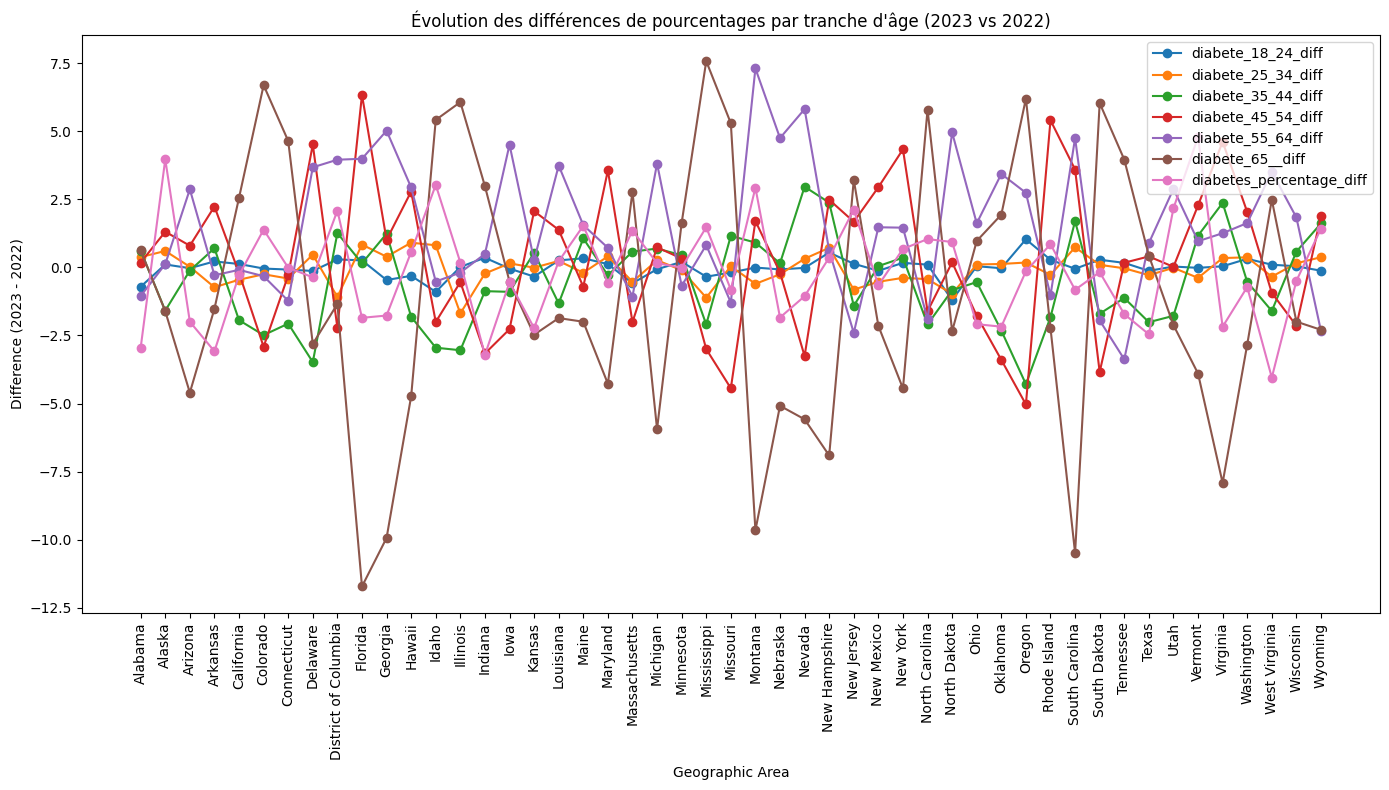

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

# Tracer les différences pour chaque tranche d'âge
for col in [f"{col}_diff" for col in targets]:
    plt.plot(diff_23_22['Geographic Area'], diff_23_22[col], marker='o', label=col)

# Personnalisation du graphique
plt.xticks(rotation=90)  # Rotation des noms des États
plt.xlabel('Geographic Area')
plt.ylabel('Difference (2023 - 2022)')
plt.title('Évolution des différences de pourcentages par tranche d\'âge (2023 vs 2022)')
plt.legend(loc='upper right')
plt.tight_layout()

# Afficher le graphique
plt.show()


## **Analyse**:

- La tranche d'âge,  diabete_65_ (en brun), montre une augmentation importante dans les Etats **Mississippi** et **Colorado** (environ une variation de 7.5 %).
Et donc pour ces Etats, les décideurs pourraient investir dans des programmes de sensibilisation et de prévention pour les seniors et des dépistages précoces.

- Certains États montrent des tendances générales de baisse dans plusieurs tranches d'âge (par exemple à l'état '**North Dakota**'). Les décideurs pourraient alors étudier ce qui a permis cette baisse dans cet État, et par la suite ils pourront étendre et reproduire ces stratégies réussies pour d'autre états.

- L'état West Virginia reconnait une baisse globale du % de diabète (environ 5%), tandis que l'état Alaska reconnait une augmentation d'environ 5%. Les décideurs en Alaska pourraient alors se baser sur les stratégies en West Virginia pour améliorer leurs statistiques de diabètes.

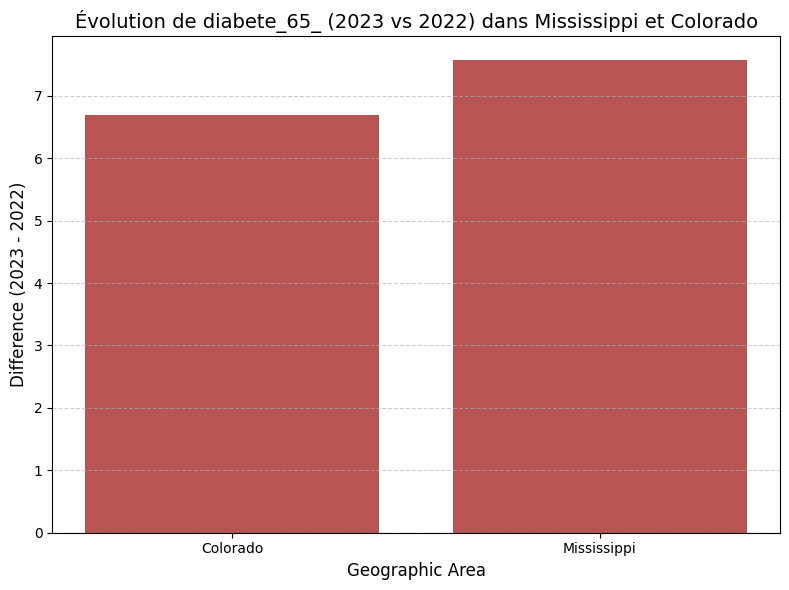

In [ ]:
import matplotlib.pyplot as plt

# Filtrer les données pour Mississippi et Colorado, et la tranche d'âge diabete_65_
subset = diff_23_22[diff_23_22['Geographic Area'].isin(['Mississippi', 'Colorado'])]

plt.figure(figsize=(8, 6))
plt.bar(subset['Geographic Area'], subset['diabete_65__diff'], color='brown', alpha=0.8)

plt.title("Évolution de diabete_65_ (2023 vs 2022) dans Mississippi et Colorado", fontsize=14)
plt.ylabel("Difference (2023 - 2022)", fontsize=12)
plt.xlabel("Geographic Area", fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


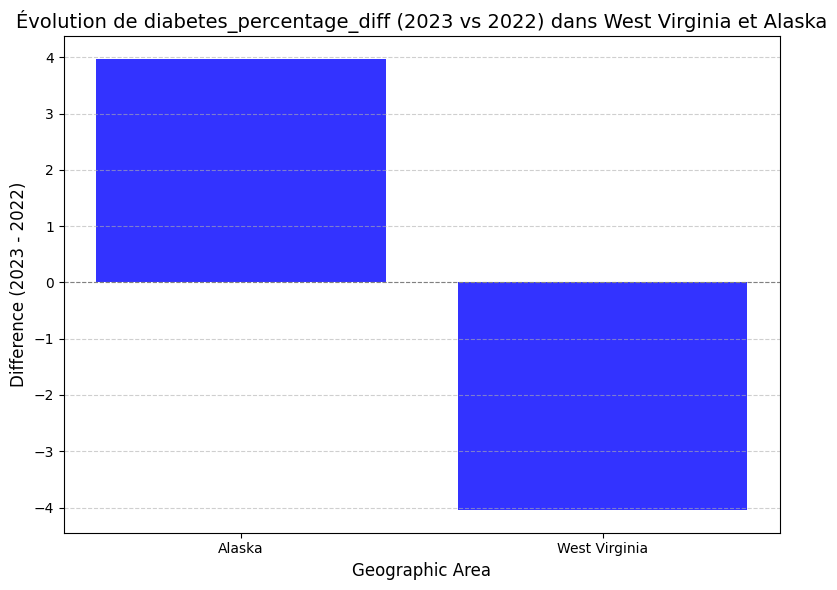

In [ ]:
import matplotlib.pyplot as plt

# Filtrer les données pour West Virginia et Alaska pour diabetes_percentage_diff
subset = diff_23_22[diff_23_22['Geographic Area'].isin(['West Virginia', 'Alaska'])]

plt.figure(figsize=(8, 6))
plt.bar(subset['Geographic Area'], subset['diabetes_percentage_diff'], color='blue', alpha=0.8)

plt.title("Évolution de diabetes_percentage_diff (2023 vs 2022) dans West Virginia et Alaska", fontsize=14)
plt.ylabel("Difference (2023 - 2022)", fontsize=12)
plt.xlabel("Geographic Area", fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


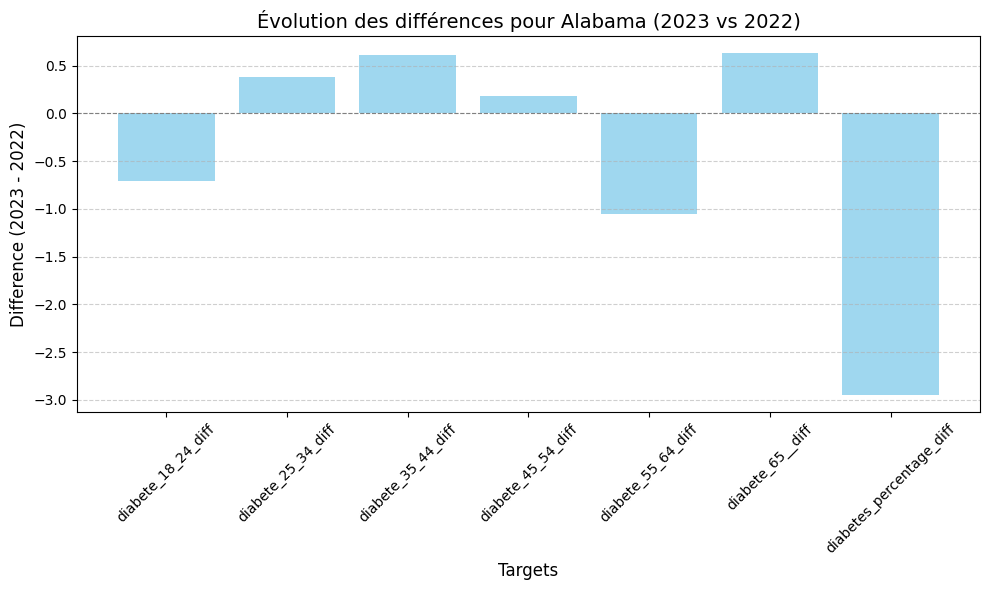

In [ ]:
# Filtrer les données pour l'État Alabama
alabama_data = diff_23_22[diff_23_22['Geographic Area'] == 'Alabama']



plt.figure(figsize=(10, 6))
targets_diff = [f"{col}_diff" for col in targets]
plt.bar(targets_diff, alabama_data[targets_diff].values[0], color='skyblue', alpha=0.8)

plt.title("Évolution des différences pour Alabama (2023 vs 2022)", fontsize=14)
plt.ylabel("Difference (2023 - 2022)", fontsize=12)
plt.xlabel("Targets", fontsize=12)
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## Méthode 2: Taux de variation

In [ ]:
merged_data_22_23 = y_22_df.merge(y_pred_23_df, on='Geographic Area', suffixes=('_2022', '_2023'))

taux_diff_23_22 = pd.DataFrame({'Geographic Area': merged_data_22_23['Geographic Area']})

for col in targets:
    # Calcul du taux de variation
    taux_diff_23_22[f'{col}_rate'] = (merged_data_22_23[f'{col}_2023'] - merged_data_22_23[f'{col}_2022']) / merged_data_22_23[f'{col}_2022'].replace(0, np.nan)

taux_diff_23_22.head()


,Geographic Area,diabete_18_24_rate,diabete_25_34_rate,diabete_35_44_rate,diabete_45_54_rate,diabete_55_64_rate,diabete_65__rate,diabetes_percentage_rate
0,Alabama,-0.664978,0.318691,0.117970,0.007612,-0.035139,0.009875,-0.159945
1,Alaska,0.450757,0.499174,-0.234202,0.110695,-0.011400,-0.031014,0.397052
2,Arizona,-0.046044,0.010814,-0.024936,0.069450,0.123721,-0.080322,-0.134180
3,Arkansas,1.369906,-0.316474,0.150152,0.173002,-0.012292,-0.026867,-0.155291
4,California,0.207608,-0.154209,-0.242604,-0.013417,-0.003794,0.052286,-0.021944


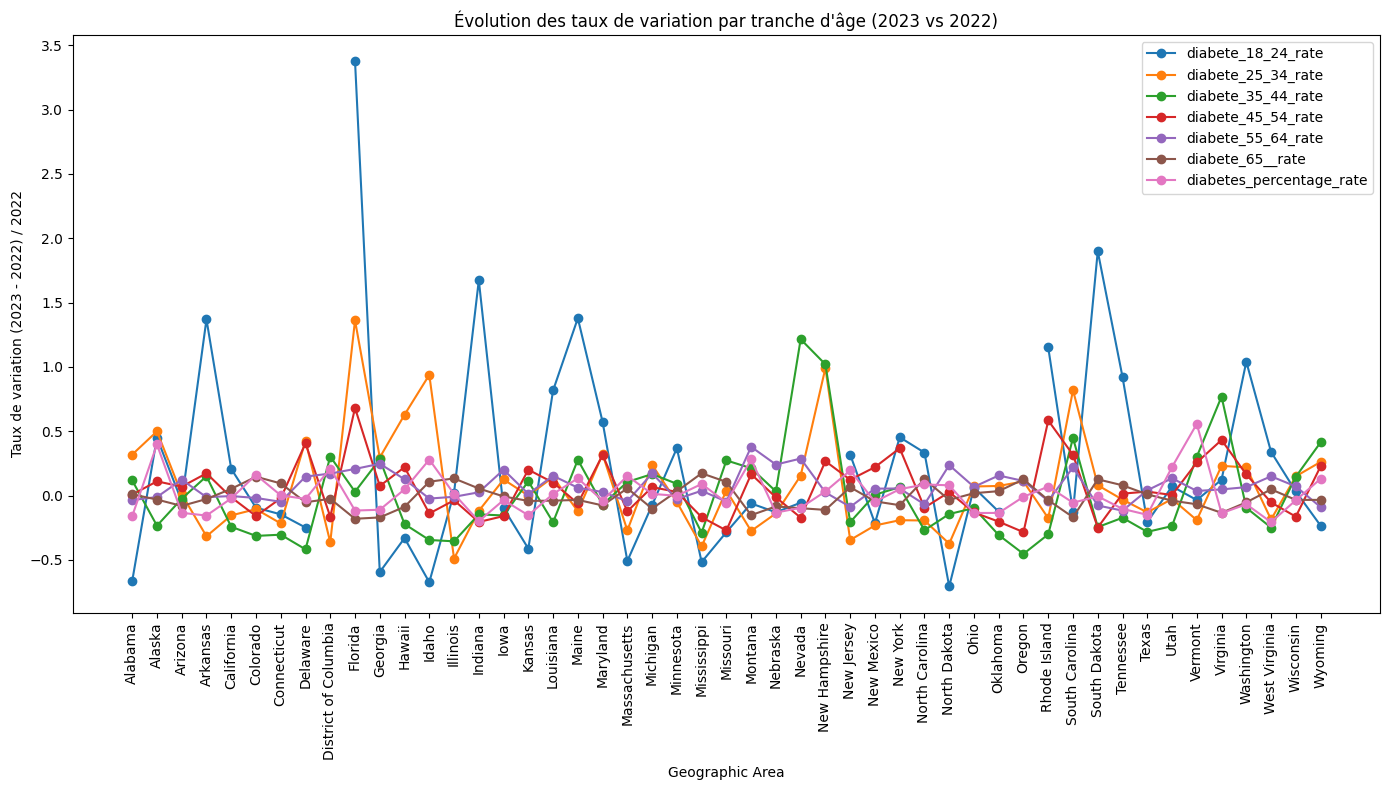

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

for col in [f"{col}_rate" for col in targets]:
    plt.plot(taux_diff_23_22['Geographic Area'], taux_diff_23_22[col], marker='o', label=col)

plt.xticks(rotation=90)
plt.xlabel('Geographic Area')
plt.ylabel('Taux de variation (2023 - 2022) / 2022')
plt.title('Évolution des taux de variation par tranche d\'âge (2023 vs 2022)')
plt.legend(loc='upper right')
plt.tight_layout()

plt.show()


- Florida : Un pic très élevé dans la tranche 18-24 ans nécessite une enquête plus approfondie sur les causes.

- Mettre en place des campagnes d'éducation axées sur la prévention, notamment dans les universités et les écoles supérieures.

- Les tranches d’âge plus âgées (ex. : 65 ans et plus) semblent plus stables

In [ ]:
state_abbreviations = {
    "Alabama": "AL", "Alaska": "AK", "Arizona": "AZ", "Arkansas": "AR", "California": "CA", "Colorado": "CO",
    "Connecticut": "CT", "Delaware": "DE", "District of Columbia": "DC", "Florida": "FL", "Georgia": "GA",
    "Hawaii": "HI", "Idaho": "ID", "Illinois": "IL", "Indiana": "IN", "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY",
    "Louisiana": "LA", "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI", "Minnesota": "MN",
    "Mississippi": "MS", "Missouri": "MO", "Montana": "MT", "Nebraska": "NE", "Nevada": "NV", "New Hampshire": "NH",
    "New Jersey": "NJ", "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND",
    "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", "Rhode Island": "RI",
    "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN", "Texas": "TX", "Utah": "UT", "Vermont": "VT",
    "Virginia": "VA", "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Wyoming": "WY"
}


taux_diff_23_22["Geographic Area"] = taux_diff_23_22["Geographic Area"].map(state_abbreviations)

import plotly.express as px

global_min = taux_diff_23_22[[f"{col}_rate" for col in targets]].min().min()
global_max = taux_diff_23_22[[f"{col}_rate" for col in targets]].max().max()

for col in targets:
    fig = px.choropleth(
        taux_diff_23_22,
        locations="Geographic Area",
        locationmode="USA-states",
        color=f"{col}_rate",
        scope="usa",
        title=f"Taux de variation pour {col} entre 2022 et 2023 par État",
        color_continuous_scale="Viridis",
        range_color=(global_min, global_max),
    )
    fig.show()


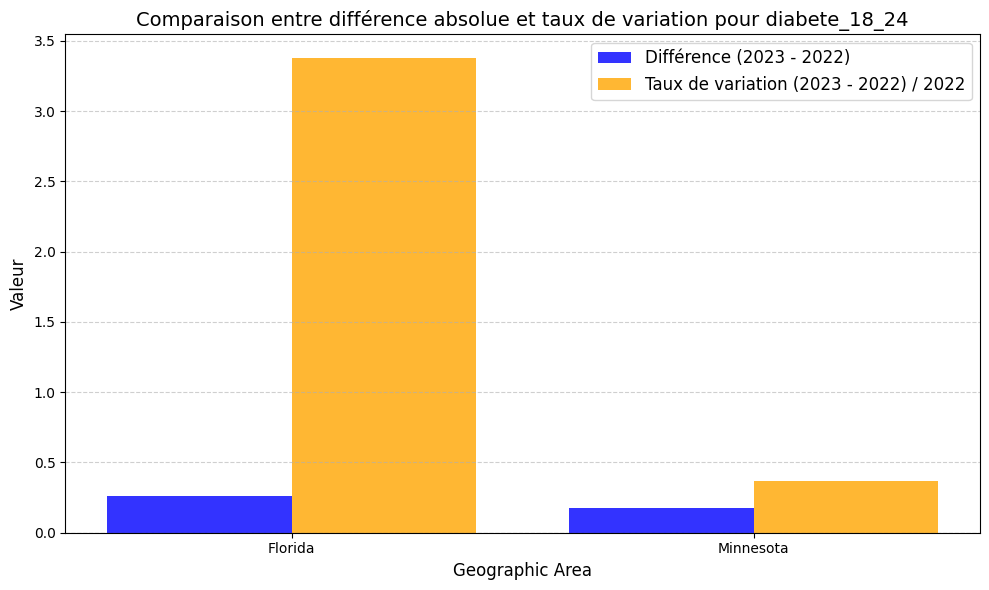

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


subset_diff = diff_23_22[diff_23_22['Geographic Area'].isin(['Florida', 'Minnesota'])]
subset_rate = taux_diff_23_22[taux_diff_23_22['Geographic Area'].isin(['Florida', 'Minnesota'])]


x = np.arange(len(subset_diff['Geographic Area']))
width = 0.4

plt.figure(figsize=(10, 6))


plt.bar(x - width/2, subset_diff['diabete_18_24_diff'], width, label='Différence (2023 - 2022)', color='blue', alpha=0.8)


plt.bar(x + width/2, subset_rate['diabete_18_24_rate'], width, label='Taux de variation (2023 - 2022) / 2022', color='orange', alpha=0.8)


plt.xticks(x, subset_diff['Geographic Area'], rotation=0)
plt.title("Comparaison entre différence absolue et taux de variation pour diabete_18_24", fontsize=14)
plt.ylabel("Valeur", fontsize=12)
plt.xlabel("Geographic Area", fontsize=12)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()


plt.show()
